In [1]:
#Imports Necessary Packages
#BeautifulSoup is for scraping
from bs4 import BeautifulSoup
import csv
import urllib3
from urllib3 import poolmanager
import pandas as pd
import numpy as np
import re
import os
import seaborn as sns
import requests
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import json
#tqdm allows for minitoring of progress
from tqdm import tqdm

In [3]:
#input API key prompt. Available at https://www.numbeo.com/common/apply_academic_api.jsp
Numbeo_API_Key = input("Input Numbeo API key within quotations")

Input Numbeo API key within quotations'ncghqiv6oniap3'


In [4]:
print 'ncghqiv6oniap3'

ncghqiv6oniap3


In [5]:
#Uses an API from numbeo that provides data on prices worldwide. The license was given to me for the project and could become invalid if numbeo chooses
http = urllib3.PoolManager()
#List of cities that Uber operates in
citylist = ('Abilene',
'Aguascalientes',
'Akron',
'Albuquerque',
'Amarillo',
'Ames',
'Anchorage',
'Ann Arbor',
'Asheville, NC',
'Athens',
'Atlanta',
'Auburn',
'Augusta',
'Austin',
'Bakersfield',
'Baltimore-Maryland',
'Baton Rouge',
'Beaumont',
'Bellingham',
'Big Island',
'Billings',
'Birmingham, AL',
'Bismarck',
'Bloomington, IN',
'Boise',
'Boone',
'Boston',
'Bowling Green, KY',
'Bozeman',
'Calgary',
'Campeche',
'Cancun',
'Carbondale',
'Cedar Rapids',
'Celaya',
'Central Atlantic Coast, FL',
'Central Oregon',
'Champaign',
'Charleston, SC',
'Charlotte',
'Charlottesville-Harrisonburg',
'Chattanooga',
'Chicago',
'Chihuahua',
'Cincinnati',
'Ciudad Juarez',
'Ciudad Obregon',
'Cleveland',
'Coastal Georgia',
"Coeur D'Alene",
'College Station',
'Colorado Springs',
'Columbia, MO',
'Columbia, SC',
'Columbus',
'Columbus, GA',
'Connecticut',
'Cookeville',
'Corpus Christi',
'Cuernavaca',
'Culiacan',
'Dallas-Fort Worth',
'Dayton',
'Delaware',
'Denver',
'Des Moines',
'Detroit',
'Dothan',
'DuBois',
'Dubuque',
'Duluth',
'Eagle Pass',
'East Alabama',
'Eastern Idaho',
'Eastern North Carolina',
'Eastern Shore',
'Eastern Washington',
'Eastern WV',
'Eau Claire',
'Edmonton',
'El Paso',
'Erie',
'Evansville, IN',
'Fairbanks',
'Fargo - Moorhead',
'Fayetteville, AR',
'Fayetteville, NC',
'Flagstaff',
'Flint',
'Florence, SC',
'Florida Keys',
'Fort Collins',
'Fort Myers-Naples',
'Fort Wayne',
'Fresno',
'Gainesville',
'Gallup',
'Gatineau',
'Golden Triangle',
'Grand Forks',
'Grand Rapids',
'Greater Maine',
'Greater Williamsport',
'Green Bay',
'Greenville, SC',
'Guadalajara',
'Guanajuato',
'Guasave',
'Guaymas',
'Gulfport-Biloxi',
'Hamilton',
'Hampton Roads',
'Harrisburg',
'Hattiesburg, MS',
'Hermosillo',
'Honolulu',
'Houston',
'Huntsville, AL',
'Indianapolis',
'Inland Empire',
'Iowa City',
'Irapuato',
'Jackson',
'Jackson, TN',
'Jacksonville',
'Johnstown-Altoona',
'Jonesboro',
'Juneau',
'Kalamazoo',
'Kansas City',
'Kauai',
'Killeen',
'Kingston',
'Kitchener-Waterloo',
'Knoxville',
'La Crosse',
'La Paz, Mexico',
'Lafayette, LA',
'Lancaster, PA',
'Lansing',
'Laredo',
'Las Cruces',
'Las Vegas',
'Lawrence',
'Lawton',
'Lehigh Valley',
'Leon',
'Lethbridge',
'Lexington',
'Lincoln',
'Little Rock',
'London, Ont',
'Los Angeles',
'Los Mochis',
'Louisville',
'Lubbock',
'Macon',
'Madison',
'Manhattan',
'Mankato',
'Maui',
'Mayaguez',
'Mazatlan',
'Memphis',
'Merida',
'Meridian',
'Mexicali',
'Mexico City',
'Miami',
'Midland-Odessa',
'Milwaukee',
'Minneapolis - St. Paul',
'Mississippi Delta',
'Missoula',
'Mobile, AL',
'Modesto',
'Monclova',
'Monroe',
'Monterrey',
'Montgomery, AL',
'Montreal',
'Morelia',
'Myrtle Beach',
'Nacogdoches',
'Nashville',
'Navojoa',
'New Hampshire',
'New Jersey',
'New Jersey (Shore)',
'New Orleans',
'New York City',
'Niagara Region',
'Nogales',
'North Georgia',
'Northern Missouri',
'Nuevo Vallarta',
'NW Indiana',
'NYC Suburbs',
'Ocala, FL',
'Oklahoma City',
'Olympia',
'Omaha',
'Orange County',
'Orlando',
'Ottawa',
'Outer Banks, NC',
'Oxford',
'Palm Springs',
'Panama City, Fl',
'Peninsula and SW WA',
'Pensacola, FL',
'Peoria, IL',
'Philadelphia',
'Phoenix',
'Piedmont Triad',
'Piedras Negras',
'Pittsburgh',
'Ponce',
'Portland',
'Portland, ME',
'Puebla',
'Puerto Vallarta',
'Quad Cities',
'Quebec City',
'Queretaro',
'Raleigh-Durham',
'Reading, PA',
'Red Deer',
'Reno',
'Rhode Island',
'Richmond',
'Rio Grande Valley',
'Roanoke-Blacksburg',
'Rochester, MN',
'Rockford',
'Rockies',
'Sacramento',
'Salamanca',
'Salt Lake City',
'Saltillo',
'San Angelo',
'San Antonio',
'San Diego',
'San Francisco Bay Area',
'San Juan, PR',
'San Luis Obispo',
'San Luis Potosi',
'San Luis Rio Colorado',
'San Miguel de Allende',
'Santa Barbara',
'Santa Fe',
'Sarasota',
'Savannah-Hilton Head',
'Seattle',
'Shreveport, LA',
'Sioux City',
'South Alabama',
'South Bend',
'South Georgia',
'South Tennessee',
'Southern Arkansas',
'Southern Oregon',
'Southern Utah',
'Spokane',
'Springfield, IL',
'Springfield, Mo',
'St Cloud',
'St Louis',
'State College',
'Stillwater',
'Tacoma',
'Tallahassee',
'Tampa Bay',
'Taos',
'Tepic',
'Terre Haute',
'Texarkana',
'the Hamptons',
'The Shoals',
'Tijuana',
'Toledo',
'Toluca',
'Topeka',
'Toronto',
'Torreon',
'Traverse City',
'Tri-Cities',
'Tri-Cities, MI',
'Tucson',
'Tulsa',
'Tuscaloosa',
'Tyler',
'Upstate NY',
'Uruapan',
'Ventura',
'Veracruz',
'Vermont',
'Villahermosa',
'Waco',
'Washington D.C.',
'Waterloo-Cedar Falls',
'West Lafayette',
'West Texas',
'Western Arizona',
'Western MA',
'Western WV',
'Wichita',
'Wichita Falls',
'Wilkes-Barre Scranton',
'Willamette Valley',
'Wilmington, NC',
'Windsor',
'Winnipeg',
'Worcester',
'Wyoming',
'York-Gettysburg',
'Youngstown',
'Yuma',
'Zacatecas',
'Central and South America',
'Anapolis',
'Angra dos Reis',
'Antofagasta',
'Aracaju',
'Aracatuba',
'Arapiraca',
'Arequipa',
'Arica',
'Barbacena',
'Barranquilla',
'Barreiras',
'Bauru',
'Belem',
'Belo Horizonte',
'Blumenau',
'Boa Vista',
'Bogota',
'Botucatu',
'Braganca Paulista',
'Brasilia',
'Bucaramanga',
'Buenos Aires',
'Cabo Frio',
'Cachoeiro de Itapemirim',
'Calama',
'Cali - Colombia',
'Campina Grande',
'Campinas',
'Campo Grande',
'Campos dos Goytacazes',
'Cartagena',
'Caruaru',
'Cascavel',
'Caxias do Sul',
'Chapeco',
'Chiclayo',
'Concepcion',
'Conselheiro Lafaiete',
'Copiapo',
'Criciuma',
'Cucuta',
'Cuiaba',
'Curitiba',
'Cusco',
'Divinopolis',
'Dourados',
'Feira de Santana',
'Florianopolis',
'Fortaleza',
'Foz do Iguacu',
'Franca',
'Garanhuns',
'Goiania',
'Governador Valadares',
'Guarapuava',
'Guatemala City',
'Guayaquil',
'Ibague',
'Iguatu',
'Imperatriz',
'Ipatinga',
'Iquique',
'Itabira',
'Itabuna e Ilheus',
'Itajai',
'Itaperuna',
'Itapipoca',
'Jequie',
'Joao Pessoa',
'Joinville',
'Juazeiro do Norte',
'Juiz de Fora',
'La Paz',
'La Serena',
'Lages',
'Lima',
'Linhares',
'Londrina',
'Los Andes',
'Macae',
'Macapa',
'Maceio',
'Manaus',
'Maraba',
'Marilia',
'Maringa',
'Medellin',
'Mendoza',
'Mogi Guacu',
'Monteria',
'Montes Claros',
'Montevideo',
'Mossoro',
'Natal',
'Nova Friburgo',
'Osorno',
'Ovalle',
'Palmas',
'Panama City, PA',
'Paranagua',
'Parauapebas',
'Parnaiba',
'Passo Fundo',
'Patos',
'Patos de Minas',
'Paulo Afonso',
'Pelotas',
'Pereira',
'Petrolina',
'Petropolis',
'Piracicaba',
'Piura',
'Pocos de Caldas',
'Ponta Grossa',
'Popayan',
'Porto Alegre',
'Porto Seguro',
'Porto Velho',
'Pouso Alegre',
'Presidente Prudente',
'Puerto Montt',
'Puerto Plata',
'Punta Arenas',
'Punta del Este',
'Quito',
'Rancagua',
'Recife',
'Ribeirao Preto',
'Rio Branco',
'Rio De Janeiro',
'Rio Verde',
'Rondonopolis',
'Salvador',
'San Jose, CR',
'San Salvador',
'Santa Cruz do Capibaribe',
'Santa Cruz do Sul',
'Santa Cruz, BO',
'Santa Maria',
'Santarem',
'Santiago',
'Santiago, DR',
'Santo Antonio de Jesus',
'Santo Domingo',
'Santos',
'Sao Carlos',
'Sao Jose do Rio Preto',
'Sao Jose dos Campos',
'Sao Luis',
'Sao Paulo',
'Sobral',
'Sorocaba',
'Talca',
'Teixeira de Freitas',
'Temuco',
'Teresina',
'Tres Rios',
'Uba',
'Uberaba',
'Uberlandia',
'Valdivia',
'Valenca',
'Valledupar',
'Valparaiso',
'Varginha',
'Vitoria',
'Vitoria da Conquista',
'Volta Redonda',
'Europe',
'Middle East',
'Almaty',
'Amman',
'Astana',
'Baku',
'Beirut',
'Doha',
'Dubai',
'Eastern Province, KSA',
'Jeddah',
'Madinah',
'Manama',
'Qassim',
'Riyadh',
'Shymkent',
'Tel Aviv',
'Africa',
'Abuja',
'Accra',
'Alexandria',
'Cairo',
'Cape Town',
'Casablanca',
'Dar Es Salaam',
'Durban',
'Johannesburg and Pretoria',
'Kampala',
'Kumasi',
'Lagos',
'Mombasa',
'Nairobi',
'Port Elizabeth',
'East Asia',
'Awaji Island',
'Fukuoka',
'Hong Kong',
'Hsinchu',
'Incheon',
'Kaohsiung',
'Kobe',
'Kyotango',
'Kyoto',
'Macau',
'Osaka',
'Seoul',
'Taichung',
'Taipei',
'Tokyo',
'Yokohama',
'South Asia',
'Ahmedabad',
'Ajmer',
'Amritsar',
'Bangalore',
'Bhopal',
'Bhubaneswar',
'Chandigarh',
'Chennai',
'Chittagong',
'Coimbatore',
'Colombo',
'Delhi NCR',
'Dhaka',
'Faisalabad',
'Gujranwala',
'Guwahati',
'Hyderabad',
'Hyderabad, Pakistan',
'Indore',
'Islamabad',
'Jaipur',
'Jodhpur',
'Karachi',
'Kochi',
'Kolkata',
'Lahore',
'Lucknow',
'Ludhiana',
'Mangalore',
'Multan',
'Mumbai',
'Mysore',
'Nagpur',
'Nashik',
'Peshawar',
'Pune',
'Surat',
'Thiruvananthapuram',
'Udaipur',
'Vadodara',
'Vijayawada',
'Visakhapatnam',
'Southeast Asia',
'Bali',
'Balikpapan',
'Bandung',
'Bangkok',
'Banjarmasin',
'Banyuwangi',
'Batam',
'Batu Pahat',
'Cebu',
'Chiang Mai',
'Chiang Rai',
'Cirebon',
'Danang',
'Hanoi',
'Hat Yai',
'Ho Chi Minh City',
'Ipoh',
'Jakarta',
'Jambi',
'Johor Bahru',
'Khon Kaen',
'Kota Kinabalu',
'Kuala Lumpur',
'Kuala Terengganu',
'Kuantan',
'Kuching',
'Lampung',
'Lombok',
'Makassar',
'Malang',
'Manado',
'Manila',
'Medan',
'Melaka',
'Nha Trang',
'Padang',
'Palembang',
'Pampanga',
'Pattaya',
'Pekanbaru',
'Penang',
'Phnom Penh',
'Pontianak',
'Sandakan',
'Semarang',
'Serang',
'Singapore',
'Surabaya',
'Surakarta',
'Yangon',
'Yogyakarta',
'Australia and New Zealand',
'Adelaide',
'Auckland',
'Bendigo and Ballarat',
'Brisbane',
'Bunbury',
'Busselton',
'Byron Bay',
'Cairns',
'Canberra',
'Christchurch',
'Darwin',
'Dunedin',
'Geelong',
'Gold Coast',
'Hamilton, NZ',
'Hobart',
'Launceston',
'Melbourne',
'Mornington Peninsula',
'Newcastle',
'Perth',
'Queenstown',
'Sunshine Coast',
'Sydney',
'Tauranga',
'Toowoomba',
'Townsville',
'Wellington',
'Wollongong',
'Algarve',
'Amsterdam',
'Athens, GR',
'Barcelona',
'Basel',
'Belfast',
'Berlin',
'Birmingham, UK',
'Bordeaux',
'Brasov',
'Brighton and Sussex',
'Brussels',
'Bucharest',
'Budapest',
'Cambridge and East Anglia',
'Cardiff',
'Chelyabinsk',
'Cluj',
'Cologne',
'Copenhagen',
'Croatian Coast',
'Dnipro',
'Dublin',
'Dusseldorf',
'Edinburgh',
'Ekaterinburg',
'Frankfurt',
'Geneva',
'Glasgow',
'Gothenburg',
'Hamburg',
'Helsinki',
'Home Counties',
'Istanbul',
'Kazan',
'Kharkiv',
'Krakow',
'Krasnodar',
'Krasnoyarsk',
'Kyiv',
'Lausanne',
'Leeds',
'Leicester',
'Leipzig',
'Lille',
'Lisbon',
'Lodz',
'London',
'Lviv',
'Lyon',
'Madrid',
'Málaga',
'Malmö',
'Manchester',
'Marseille',
'Merseyside',
'Milan',
'Minsk',
'Montpellier',
'Moscow',
'Munich',
'Nantes',
'Nice',
'Nizhny Novgorod',
'North East, UK',
'Nottingham',
'Novosibirsk',
'Odessa',
'Omsk',
'Oslo',
'Paris',
'Perm',
'Porto',
'Poznan',
'Prague',
'Rennes',
'Rome',
'Rostov-On-Don',
'Saint Petersburg',
'Samara',
'Sheffield',
'Silesia',
'Sochi',
'South Coast, UK',
'South West, UK',
'Southern Netherlands',
'Stockholm',
'Stoke',
'Strasbourg',
'Tallinn',
'Timisoara',
'Toulouse',
'Trojmiasto',
'Ufa',
'Vienna',
'Vilnius',
'Vinnytsia',
'Voronezh',
'Warsaw',
'Wroclaw',
'York',
'Zagreb',
'Zaporizhia',
'Zurich')

#dictionary of taxi data
d = []
print "Getting Taxi Data"
for city in tqdm(citylist):
    try:
        print city
        #for every city in list the api is queried
        url = "https://www.numbeo.com/api/city_prices?api_key="+Numbeo_API_Key+"&query="+city
        r = http.request('GET', url)
        jsondata= json.loads(r.data.decode('utf-8'))
        #selects the data relevent to this project
        dataprices = pd.DataFrame(jsondata['prices'])
        #further filters the data
        if len(dataprices[dataprices['item_name']=='Taxi 1km (Normal Tariff), Transportation'])>0:
            datacurrency = pd.DataFrame(jsondata)
            #retrieves the currency... vital for conversion to common currency
            currency = datacurrency['currency'][0]
            fullname = datacurrency['name'][0]
            Taxi_1km = float(dataprices[dataprices['item_name']=='Taxi 1km (Normal Tariff), Transportation']['average_price'])
            Taxi_Start = float(dataprices[dataprices['item_name']=='Taxi Start (Normal Tariff), Transportation']['average_price'])
            McMeal = float(dataprices[dataprices['item_name']=='McMeal at McDonalds (or Equivalent Combo Meal), Restaurants']['average_price'])
            #appends dictionary of the city taxi data
            d.append({'City':city,
                      'fullname':fullname,
                      'currency':currency,
                      'Taxi_Start':Taxi_Start,
                      'Taxi_1km_avg':Taxi_1km,
                      'McMeal':McMeal})
    except:
        print "couldn't resolve city"

Getting Taxi Data


  0%|                                                  | 0/767 [00:00<?, ?it/s]

Abilene


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  0%|                                          | 1/767 [00:00<11:39,  1.10it/s]

Aguascalientes


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  0%|                                          | 2/767 [00:01<10:27,  1.22it/s]

Akron


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  0%|▏                                         | 3/767 [00:01<07:44,  1.64it/s]

Albuquerque


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  1%|▏                                         | 4/767 [00:02<06:23,  1.99it/s]

Amarillo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  1%|▎                                         | 5/767 [00:02<05:33,  2.29it/s]

Ames


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  1%|▎                                         | 6/767 [00:02<04:59,  2.54it/s]

Anchorage


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  1%|▍                                         | 7/767 [00:02<04:36,  2.75it/s]

Ann Arbor


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  1%|▍                                         | 8/767 [00:02<04:17,  2.95it/s]

Asheville, NC


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  1%|▍                                         | 9/767 [00:03<04:42,  2.68it/s]

Athens


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  1%|▌                                        | 10/767 [00:04<05:04,  2.49it/s]

Atlanta


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  1%|▌                                        | 11/767 [00:04<04:48,  2.62it/s]

Auburn


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  2%|▋                                        | 12/767 [00:04<04:35,  2.74it/s]

Augusta


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  2%|▋                                        | 13/767 [00:04<04:24,  2.85it/s]

Austin


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  2%|▋                                        | 14/767 [00:04<04:14,  2.96it/s]

Bakersfield


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  2%|▊                                        | 15/767 [00:04<04:06,  3.05it/s]

Baltimore-Maryland


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  2%|▊                                        | 16/767 [00:05<03:58,  3.15it/s]

Baton Rouge


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  2%|▉                                        | 17/767 [00:05<03:51,  3.24it/s]

Beaumont


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  2%|▉                                        | 18/767 [00:05<04:05,  3.05it/s]

Bellingham


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  2%|█                                        | 19/767 [00:06<03:59,  3.12it/s]

Big Island


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  3%|█                                        | 20/767 [00:06<03:53,  3.20it/s]

Billings


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  3%|█                                        | 21/767 [00:06<04:05,  3.03it/s]

Birmingham, AL


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  3%|█▏                                       | 22/767 [00:07<04:00,  3.10it/s]

Bismarck


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  3%|█▏                                       | 23/767 [00:07<04:10,  2.97it/s]

Bloomington, IN


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  3%|█▎                                       | 24/767 [00:07<04:05,  3.03it/s]

Boise


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  3%|█▎                                       | 25/767 [00:08<04:14,  2.91it/s]

Boone


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  3%|█▍                                       | 26/767 [00:08<04:09,  2.97it/s]

Boston


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  4%|█▍                                       | 27/767 [00:08<04:05,  3.02it/s]

Bowling Green, KY


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  4%|█▍                                       | 28/767 [00:09<04:00,  3.07it/s]

Bozeman


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  4%|█▌                                       | 29/767 [00:09<04:08,  2.97it/s]

Calgary


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  4%|█▌                                       | 30/767 [00:09<04:04,  3.01it/s]

Campeche


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  4%|█▋                                       | 31/767 [00:10<04:00,  3.06it/s]

Cancun


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  4%|█▋                                       | 32/767 [00:10<03:56,  3.10it/s]

Carbondale


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  4%|█▊                                       | 33/767 [00:10<03:53,  3.14it/s]

Cedar Rapids


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  4%|█▊                                       | 34/767 [00:10<03:50,  3.19it/s]

Celaya


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  5%|█▊                                       | 35/767 [00:11<03:56,  3.09it/s]

Central Atlantic Coast, FL


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  5%|█▉                                       | 36/767 [00:11<03:53,  3.13it/s]

Central Oregon


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  5%|█▉                                       | 37/767 [00:12<03:59,  3.05it/s]

Champaign


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  5%|██                                       | 38/767 [00:12<04:05,  2.97it/s]

Charleston, SC


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  5%|██                                       | 39/767 [00:12<04:02,  3.01it/s]

Charlotte


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  5%|██▏                                      | 40/767 [00:13<04:07,  2.93it/s]

Charlottesville-Harrisonburg


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  5%|██▏                                      | 41/767 [00:13<04:04,  2.97it/s]

Chattanooga


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  5%|██▏                                      | 42/767 [00:13<04:01,  3.00it/s]

Chicago


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  6%|██▎                                      | 43/767 [00:14<03:58,  3.04it/s]

Chihuahua


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  6%|██▎                                      | 44/767 [00:14<03:56,  3.06it/s]

Cincinnati


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  6%|██▍                                      | 45/767 [00:14<03:53,  3.09it/s]

Ciudad Juarez


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  6%|██▍                                      | 46/767 [00:14<03:50,  3.13it/s]

Ciudad Obregon


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  6%|██▌                                      | 47/767 [00:15<03:55,  3.06it/s]

Cleveland


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  6%|██▌                                      | 48/767 [00:16<03:59,  3.00it/s]

Coastal Georgia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  6%|██▌                                      | 49/767 [00:16<03:57,  3.03it/s]

Coeur D'Alene


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  7%|██▋                                      | 50/767 [00:16<04:01,  2.97it/s]

College Station


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  7%|██▋                                      | 51/767 [00:17<04:04,  2.92it/s]

Colorado Springs


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  7%|██▊                                      | 52/767 [00:18<04:08,  2.87it/s]

Columbia, MO


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  7%|██▊                                      | 53/767 [00:18<04:12,  2.83it/s]

Columbia, SC


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  7%|██▉                                      | 54/767 [00:19<04:15,  2.79it/s]

Columbus


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  7%|██▉                                      | 55/767 [00:20<04:19,  2.75it/s]

Columbus, GA


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  7%|██▉                                      | 56/767 [00:20<04:16,  2.77it/s]

Connecticut


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  7%|███                                      | 57/767 [00:20<04:19,  2.73it/s]

Cookeville


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  8%|███                                      | 58/767 [00:21<04:17,  2.76it/s]

Corpus Christi


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  8%|███▏                                     | 59/767 [00:21<04:14,  2.78it/s]

Cuernavaca


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  8%|███▏                                     | 60/767 [00:21<04:17,  2.74it/s]

Culiacan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  8%|███▎                                     | 61/767 [00:22<04:15,  2.76it/s]

Dallas-Fort Worth


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  8%|███▎                                     | 62/767 [00:22<04:12,  2.79it/s]

Dayton


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  8%|███▎                                     | 63/767 [00:22<04:15,  2.75it/s]

Delaware


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  8%|███▍                                     | 64/767 [00:23<04:13,  2.77it/s]

Denver


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  8%|███▍                                     | 65/767 [00:23<04:11,  2.79it/s]

Des Moines


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  9%|███▌                                     | 66/767 [00:23<04:08,  2.82it/s]

Detroit


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  9%|███▌                                     | 67/767 [00:24<04:11,  2.78it/s]

Dothan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  9%|███▋                                     | 68/767 [00:24<04:09,  2.80it/s]

DuBois


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  9%|███▋                                     | 69/767 [00:24<04:07,  2.82it/s]

Dubuque


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  9%|███▋                                     | 70/767 [00:24<04:05,  2.84it/s]

Duluth


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  9%|███▊                                     | 71/767 [00:24<04:03,  2.86it/s]

Eagle Pass


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


  9%|███▊                                     | 72/767 [00:24<04:01,  2.88it/s]

East Alabama


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 10%|███▉                                     | 73/767 [00:25<04:03,  2.85it/s]

Eastern Idaho


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 10%|███▉                                     | 74/767 [00:26<04:06,  2.82it/s]

Eastern North Carolina


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 10%|████                                     | 75/767 [00:27<04:12,  2.74it/s]

Eastern Shore


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 10%|████                                     | 76/767 [00:28<04:15,  2.71it/s]

Eastern Washington


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 10%|████                                     | 77/767 [00:28<04:17,  2.68it/s]

Eastern WV


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 10%|████▏                                    | 78/767 [00:29<04:19,  2.66it/s]

Eau Claire


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 10%|████▏                                    | 79/767 [00:29<04:21,  2.63it/s]

Edmonton


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 10%|████▎                                    | 80/767 [00:30<04:23,  2.61it/s]

El Paso


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 11%|████▎                                    | 81/767 [00:30<04:21,  2.63it/s]

Erie


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 11%|████▍                                    | 82/767 [00:31<04:23,  2.60it/s]

Evansville, IN


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 11%|████▍                                    | 83/767 [00:31<04:20,  2.62it/s]

Fairbanks


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 11%|████▍                                    | 84/767 [00:32<04:22,  2.60it/s]

Fargo - Moorhead


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 11%|████▌                                    | 85/767 [00:32<04:20,  2.62it/s]

Fayetteville, AR


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 11%|████▌                                    | 86/767 [00:33<04:22,  2.60it/s]

Fayetteville, NC


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 11%|████▋                                    | 87/767 [00:33<04:24,  2.58it/s]

Flagstaff


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 11%|████▋                                    | 88/767 [00:34<04:25,  2.56it/s]

Flint


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 12%|████▊                                    | 89/767 [00:34<04:23,  2.57it/s]

Florence, SC


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 12%|████▊                                    | 90/767 [00:34<04:21,  2.59it/s]

Florida Keys


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 12%|████▊                                    | 91/767 [00:35<04:23,  2.57it/s]

Fort Collins


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 12%|████▉                                    | 92/767 [00:36<04:24,  2.55it/s]

Fort Myers-Naples


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 12%|████▉                                    | 93/767 [00:36<04:26,  2.53it/s]

Fort Wayne


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 12%|█████                                    | 94/767 [00:37<04:27,  2.51it/s]

Fresno


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 12%|█████                                    | 95/767 [00:38<04:29,  2.50it/s]

Gainesville


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 13%|█████▏                                   | 96/767 [00:38<04:27,  2.51it/s]

Gallup


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 13%|█████▏                                   | 97/767 [00:38<04:25,  2.53it/s]

Gatineau


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 13%|█████▏                                   | 98/767 [00:38<04:23,  2.54it/s]

Golden Triangle


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 13%|█████▎                                   | 99/767 [00:38<04:21,  2.56it/s]

Grand Forks


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 13%|█████▏                                  | 100/767 [00:39<04:22,  2.54it/s]

Grand Rapids


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 13%|█████▎                                  | 101/767 [00:40<04:24,  2.52it/s]

Greater Maine


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 13%|█████▎                                  | 102/767 [00:40<04:25,  2.51it/s]

Greater Williamsport


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 13%|█████▎                                  | 103/767 [00:41<04:26,  2.49it/s]

Green Bay


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 14%|█████▍                                  | 104/767 [00:41<04:27,  2.48it/s]

Greenville, SC


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 14%|█████▍                                  | 105/767 [00:42<04:28,  2.46it/s]

Guadalajara


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 14%|█████▌                                  | 106/767 [00:43<04:30,  2.45it/s]

Guanajuato


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 14%|█████▌                                  | 107/767 [00:43<04:28,  2.46it/s]

Guasave


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 14%|█████▋                                  | 108/767 [00:43<04:26,  2.47it/s]

Guaymas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 14%|█████▋                                  | 109/767 [00:43<04:24,  2.49it/s]

Gulfport-Biloxi


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 14%|█████▋                                  | 110/767 [00:43<04:22,  2.50it/s]

Hamilton


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 14%|█████▊                                  | 111/767 [00:44<04:21,  2.51it/s]

Hampton Roads


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 15%|█████▊                                  | 112/767 [00:44<04:19,  2.53it/s]

Harrisburg


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 15%|█████▉                                  | 113/767 [00:45<04:20,  2.51it/s]

Hattiesburg, MS


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 15%|█████▉                                  | 114/767 [00:45<04:18,  2.52it/s]

Hermosillo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 15%|█████▉                                  | 115/767 [00:45<04:19,  2.51it/s]

Honolulu


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 15%|██████                                  | 116/767 [00:46<04:18,  2.52it/s]

Houston


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 15%|██████                                  | 117/767 [00:46<04:16,  2.53it/s]

Huntsville, AL


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 15%|██████▏                                 | 118/767 [00:46<04:15,  2.54it/s]

Indianapolis


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 16%|██████▏                                 | 119/767 [00:47<04:16,  2.53it/s]

Inland Empire


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 16%|██████▎                                 | 120/767 [00:47<04:14,  2.54it/s]

Iowa City


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 16%|██████▎                                 | 121/767 [00:47<04:15,  2.53it/s]

Irapuato


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 16%|██████▎                                 | 122/767 [00:48<04:16,  2.51it/s]

Jackson


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 16%|██████▍                                 | 123/767 [00:48<04:14,  2.53it/s]

Jackson, TN


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 16%|██████▍                                 | 124/767 [00:48<04:13,  2.54it/s]

Jacksonville


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 16%|██████▌                                 | 125/767 [00:49<04:14,  2.52it/s]

Johnstown-Altoona


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 16%|██████▌                                 | 126/767 [00:49<04:12,  2.54it/s]

Jonesboro


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 17%|██████▌                                 | 127/767 [00:49<04:11,  2.55it/s]

Juneau


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 17%|██████▋                                 | 128/767 [00:50<04:09,  2.56it/s]

Kalamazoo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 17%|██████▋                                 | 129/767 [00:50<04:08,  2.57it/s]

Kansas City


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 17%|██████▊                                 | 130/767 [00:50<04:06,  2.58it/s]

Kauai


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 17%|██████▊                                 | 131/767 [00:51<04:07,  2.56it/s]

Killeen


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 17%|██████▉                                 | 132/767 [00:51<04:06,  2.58it/s]

Kingston


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 17%|██████▉                                 | 133/767 [00:51<04:05,  2.59it/s]

Kitchener-Waterloo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 17%|██████▉                                 | 134/767 [00:51<04:03,  2.60it/s]

Knoxville


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 18%|███████                                 | 135/767 [00:51<04:02,  2.61it/s]

La Crosse


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 18%|███████                                 | 136/767 [00:51<04:01,  2.62it/s]

La Paz, Mexico


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 18%|███████▏                                | 137/767 [00:52<04:01,  2.60it/s]

Lafayette, LA


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 18%|███████▏                                | 138/767 [00:53<04:02,  2.59it/s]

Lancaster, PA


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 18%|███████▏                                | 139/767 [00:53<04:03,  2.58it/s]

Lansing


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 18%|███████▎                                | 140/767 [00:54<04:04,  2.57it/s]

Laredo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 18%|███████▎                                | 141/767 [00:54<04:03,  2.58it/s]

Las Cruces


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 19%|███████▍                                | 142/767 [00:54<04:01,  2.59it/s]

Las Vegas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 19%|███████▍                                | 143/767 [00:55<04:02,  2.57it/s]

Lawrence


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 19%|███████▌                                | 144/767 [00:56<04:03,  2.56it/s]

Lawton


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 19%|███████▌                                | 145/767 [00:56<04:02,  2.57it/s]

Lehigh Valley


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 19%|███████▌                                | 146/767 [00:56<04:00,  2.58it/s]

Leon


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 19%|███████▋                                | 147/767 [00:57<04:01,  2.57it/s]

Lethbridge


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 19%|███████▋                                | 148/767 [00:57<04:00,  2.58it/s]

Lexington


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 19%|███████▊                                | 149/767 [00:57<03:59,  2.59it/s]

Lincoln


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 20%|███████▊                                | 150/767 [00:57<03:57,  2.59it/s]

Little Rock


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 20%|███████▊                                | 151/767 [00:57<03:56,  2.60it/s]

London, Ont


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 20%|███████▉                                | 152/767 [00:58<03:57,  2.59it/s]

Los Angeles


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 20%|███████▉                                | 153/767 [00:59<03:57,  2.58it/s]

Los Mochis


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 20%|████████                                | 154/767 [00:59<03:58,  2.57it/s]

Louisville


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 20%|████████                                | 155/767 [01:00<03:59,  2.56it/s]

Lubbock


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 20%|████████▏                               | 156/767 [01:00<03:57,  2.57it/s]

Macon


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 20%|████████▏                               | 157/767 [01:00<03:56,  2.58it/s]

Madison


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 21%|████████▏                               | 158/767 [01:01<03:55,  2.59it/s]

Manhattan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 21%|████████▎                               | 159/767 [01:01<03:54,  2.59it/s]

Mankato


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 21%|████████▎                               | 160/767 [01:01<03:53,  2.60it/s]

Maui


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 21%|████████▍                               | 161/767 [01:01<03:52,  2.61it/s]

Mayaguez


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 21%|████████▍                               | 162/767 [01:01<03:51,  2.62it/s]

Mazatlan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 21%|████████▌                               | 163/767 [01:02<03:50,  2.63it/s]

Memphis


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 21%|████████▌                               | 164/767 [01:02<03:48,  2.63it/s]

Merida


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 22%|████████▌                               | 165/767 [01:02<03:47,  2.64it/s]

Meridian


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 22%|████████▋                               | 166/767 [01:02<03:46,  2.65it/s]

Mexicali


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 22%|████████▋                               | 167/767 [01:02<03:45,  2.66it/s]

Mexico City


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 22%|████████▊                               | 168/767 [01:02<03:44,  2.67it/s]

Miami


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 22%|████████▊                               | 169/767 [01:03<03:45,  2.66it/s]

Midland-Odessa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 22%|████████▊                               | 170/767 [01:03<03:44,  2.66it/s]

Milwaukee


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 22%|████████▉                               | 171/767 [01:03<03:42,  2.67it/s]

Minneapolis - St. Paul


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 22%|████████▉                               | 172/767 [01:04<03:41,  2.68it/s]

Mississippi Delta


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 23%|█████████                               | 173/767 [01:04<03:42,  2.67it/s]

Missoula


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 23%|█████████                               | 174/767 [01:05<03:43,  2.66it/s]

Mobile, AL


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 23%|█████████▏                              | 175/767 [01:05<03:42,  2.67it/s]

Modesto


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 23%|█████████▏                              | 176/767 [01:06<03:42,  2.65it/s]

Monclova


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 23%|█████████▏                              | 177/767 [01:06<03:41,  2.66it/s]

Monroe


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 23%|█████████▎                              | 178/767 [01:06<03:40,  2.67it/s]

Monterrey


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 23%|█████████▎                              | 179/767 [01:06<03:39,  2.68it/s]

Montgomery, AL


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 23%|█████████▍                              | 180/767 [01:07<03:38,  2.68it/s]

Montreal


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 24%|█████████▍                              | 181/767 [01:07<03:39,  2.67it/s]

Morelia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 24%|█████████▍                              | 182/767 [01:07<03:38,  2.68it/s]

Myrtle Beach


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 24%|█████████▌                              | 183/767 [01:08<03:37,  2.69it/s]

Nacogdoches


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 24%|█████████▌                              | 184/767 [01:08<03:37,  2.68it/s]

Nashville


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 24%|█████████▋                              | 185/767 [01:08<03:36,  2.68it/s]

Navojoa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 24%|█████████▋                              | 186/767 [01:09<03:35,  2.69it/s]

New Hampshire


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 24%|█████████▊                              | 187/767 [01:09<03:34,  2.70it/s]

New Jersey


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 25%|█████████▊                              | 188/767 [01:09<03:35,  2.69it/s]

New Jersey (Shore)


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 25%|█████████▊                              | 189/767 [01:10<03:35,  2.68it/s]

New Orleans


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 25%|█████████▉                              | 190/767 [01:11<03:36,  2.67it/s]

New York City


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 25%|█████████▉                              | 191/767 [01:11<03:36,  2.66it/s]

Niagara Region


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 25%|██████████                              | 192/767 [01:12<03:37,  2.65it/s]

Nogales


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 25%|██████████                              | 193/767 [01:13<03:37,  2.64it/s]

North Georgia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 25%|██████████                              | 194/767 [01:13<03:36,  2.64it/s]

Northern Missouri


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 25%|██████████▏                             | 195/767 [01:14<03:37,  2.63it/s]

Nuevo Vallarta


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 26%|██████████▏                             | 196/767 [01:14<03:37,  2.62it/s]

NW Indiana


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 26%|██████████▎                             | 197/767 [01:15<03:37,  2.62it/s]

NYC Suburbs


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 26%|██████████▎                             | 198/767 [01:15<03:38,  2.61it/s]

Ocala, FL


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 26%|██████████▍                             | 199/767 [01:16<03:38,  2.60it/s]

Oklahoma City


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 26%|██████████▍                             | 200/767 [01:17<03:39,  2.59it/s]

Olympia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 26%|██████████▍                             | 201/767 [01:17<03:39,  2.58it/s]

Omaha


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 26%|██████████▌                             | 202/767 [01:18<03:38,  2.59it/s]

Orange County


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 26%|██████████▌                             | 203/767 [01:18<03:37,  2.59it/s]

Orlando


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 27%|██████████▋                             | 204/767 [01:18<03:37,  2.58it/s]

Ottawa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 27%|██████████▋                             | 205/767 [01:19<03:36,  2.59it/s]

Outer Banks, NC


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 27%|██████████▋                             | 206/767 [01:19<03:35,  2.60it/s]

Oxford


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 27%|██████████▊                             | 207/767 [01:19<03:36,  2.59it/s]

Palm Springs


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 27%|██████████▊                             | 208/767 [01:20<03:35,  2.60it/s]

Panama City, Fl


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 27%|██████████▉                             | 209/767 [01:20<03:35,  2.59it/s]

Peninsula and SW WA


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 27%|██████████▉                             | 210/767 [01:21<03:35,  2.58it/s]

Pensacola, FL


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 28%|███████████                             | 211/767 [01:22<03:36,  2.57it/s]

Peoria, IL


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 28%|███████████                             | 212/767 [01:22<03:36,  2.56it/s]

Philadelphia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 28%|███████████                             | 213/767 [01:23<03:36,  2.56it/s]

Phoenix


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 28%|███████████▏                            | 214/767 [01:23<03:35,  2.56it/s]

Piedmont Triad


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 28%|███████████▏                            | 215/767 [01:23<03:34,  2.57it/s]

Piedras Negras


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 28%|███████████▎                            | 216/767 [01:24<03:35,  2.56it/s]

Pittsburgh


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 28%|███████████▎                            | 217/767 [01:24<03:35,  2.55it/s]

Ponce


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 28%|███████████▎                            | 218/767 [01:25<03:34,  2.56it/s]

Portland


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 29%|███████████▍                            | 219/767 [01:25<03:33,  2.57it/s]

Portland, ME


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 29%|███████████▍                            | 220/767 [01:25<03:32,  2.57it/s]

Puebla


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 29%|███████████▌                            | 221/767 [01:26<03:32,  2.56it/s]

Puerto Vallarta


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 29%|███████████▌                            | 222/767 [01:26<03:32,  2.57it/s]

Quad Cities


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 29%|███████████▋                            | 223/767 [01:27<03:32,  2.56it/s]

Quebec City


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 29%|███████████▋                            | 224/767 [01:27<03:32,  2.56it/s]

Queretaro


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 29%|███████████▋                            | 225/767 [01:28<03:32,  2.55it/s]

Raleigh-Durham


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 29%|███████████▊                            | 226/767 [01:28<03:31,  2.55it/s]

Reading, PA


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 30%|███████████▊                            | 227/767 [01:28<03:30,  2.56it/s]

Red Deer


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 30%|███████████▉                            | 228/767 [01:29<03:31,  2.55it/s]

Reno


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 30%|███████████▉                            | 229/767 [01:29<03:31,  2.55it/s]

Rhode Island


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 30%|███████████▉                            | 230/767 [01:30<03:30,  2.55it/s]

Richmond


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 30%|████████████                            | 231/767 [01:30<03:30,  2.54it/s]

Rio Grande Valley


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 30%|████████████                            | 232/767 [01:30<03:29,  2.55it/s]

Roanoke-Blacksburg


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 30%|████████████▏                           | 233/767 [01:31<03:29,  2.54it/s]

Rochester, MN


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 31%|████████████▏                           | 234/767 [01:31<03:28,  2.55it/s]

Rockford


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 31%|████████████▎                           | 235/767 [01:32<03:29,  2.54it/s]

Rockies


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 31%|████████████▎                           | 236/767 [01:32<03:28,  2.55it/s]

Sacramento


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 31%|████████████▎                           | 237/767 [01:32<03:27,  2.56it/s]

Salamanca


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 31%|████████████▍                           | 238/767 [01:32<03:26,  2.56it/s]

Salt Lake City


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 31%|████████████▍                           | 239/767 [01:33<03:25,  2.57it/s]

Saltillo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 31%|████████████▌                           | 240/767 [01:33<03:25,  2.56it/s]

San Angelo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 31%|████████████▌                           | 241/767 [01:33<03:25,  2.57it/s]

San Antonio


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 32%|████████████▌                           | 242/767 [01:34<03:25,  2.56it/s]

San Diego


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 32%|████████████▋                           | 243/767 [01:35<03:25,  2.55it/s]

San Francisco Bay Area


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 32%|████████████▋                           | 244/767 [01:35<03:25,  2.55it/s]

San Juan, PR


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 32%|████████████▊                           | 245/767 [01:36<03:25,  2.54it/s]

San Luis Obispo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 32%|████████████▊                           | 246/767 [01:37<03:25,  2.53it/s]

San Luis Potosi


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 32%|████████████▉                           | 247/767 [01:37<03:25,  2.53it/s]

San Luis Rio Colorado


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 32%|████████████▉                           | 248/767 [01:38<03:25,  2.52it/s]

San Miguel de Allende


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 32%|████████████▉                           | 249/767 [01:39<03:26,  2.51it/s]

Santa Barbara


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 33%|█████████████                           | 250/767 [01:39<03:26,  2.51it/s]

Santa Fe


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 33%|█████████████                           | 251/767 [01:40<03:26,  2.50it/s]

Sarasota


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 33%|█████████████▏                          | 252/767 [01:41<03:26,  2.49it/s]

Savannah-Hilton Head


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 33%|█████████████▏                          | 253/767 [01:41<03:25,  2.50it/s]

Seattle


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 33%|█████████████▏                          | 254/767 [01:41<03:25,  2.49it/s]

Shreveport, LA


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 33%|█████████████▎                          | 255/767 [01:42<03:24,  2.50it/s]

Sioux City


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 33%|█████████████▎                          | 256/767 [01:42<03:24,  2.49it/s]

South Alabama


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 34%|█████████████▍                          | 257/767 [01:43<03:25,  2.49it/s]

South Bend


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 34%|█████████████▍                          | 258/767 [01:43<03:25,  2.48it/s]

South Georgia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 34%|█████████████▌                          | 259/767 [01:44<03:25,  2.48it/s]

South Tennessee


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 34%|█████████████▌                          | 260/767 [01:45<03:25,  2.47it/s]

Southern Arkansas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 34%|█████████████▌                          | 261/767 [01:45<03:25,  2.46it/s]

Southern Oregon


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 34%|█████████████▋                          | 262/767 [01:46<03:25,  2.46it/s]

Southern Utah


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 34%|█████████████▋                          | 263/767 [01:47<03:25,  2.45it/s]

Spokane


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 34%|█████████████▊                          | 264/767 [01:47<03:25,  2.45it/s]

Springfield, IL


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 35%|█████████████▊                          | 265/767 [01:48<03:24,  2.45it/s]

Springfield, Mo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 35%|█████████████▊                          | 266/767 [01:48<03:24,  2.45it/s]

St Cloud


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 35%|█████████████▉                          | 267/767 [01:49<03:24,  2.44it/s]

St Louis


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 35%|█████████████▉                          | 268/767 [01:49<03:24,  2.44it/s]

State College


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 35%|██████████████                          | 269/767 [01:50<03:24,  2.43it/s]

Stillwater


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 35%|██████████████                          | 270/767 [01:51<03:24,  2.43it/s]

Tacoma


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 35%|██████████████▏                         | 271/767 [01:51<03:23,  2.43it/s]

Tallahassee


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 35%|██████████████▏                         | 272/767 [01:51<03:23,  2.44it/s]

Tampa Bay


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 36%|██████████████▏                         | 273/767 [01:51<03:22,  2.44it/s]

Taos


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 36%|██████████████▎                         | 274/767 [01:52<03:22,  2.44it/s]

Tepic


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 36%|██████████████▎                         | 275/767 [01:52<03:21,  2.44it/s]

Terre Haute


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 36%|██████████████▍                         | 276/767 [01:52<03:20,  2.45it/s]

Texarkana


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 36%|██████████████▍                         | 277/767 [01:53<03:20,  2.44it/s]

the Hamptons


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 36%|██████████████▍                         | 278/767 [01:53<03:19,  2.45it/s]

The Shoals


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 36%|██████████████▌                         | 279/767 [01:54<03:19,  2.44it/s]

Tijuana


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 37%|██████████████▌                         | 280/767 [01:54<03:20,  2.43it/s]

Toledo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 37%|██████████████▋                         | 281/767 [01:55<03:19,  2.44it/s]

Toluca


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 37%|██████████████▋                         | 282/767 [01:55<03:18,  2.44it/s]

Topeka


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 37%|██████████████▊                         | 283/767 [01:55<03:17,  2.45it/s]

Toronto


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 37%|██████████████▊                         | 284/767 [01:55<03:16,  2.45it/s]

Torreon


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 37%|██████████████▊                         | 285/767 [01:55<03:16,  2.46it/s]

Traverse City


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 37%|██████████████▉                         | 286/767 [01:56<03:15,  2.46it/s]

Tri-Cities


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 37%|██████████████▉                         | 287/767 [01:56<03:15,  2.46it/s]

Tri-Cities, MI


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 38%|███████████████                         | 288/767 [01:56<03:14,  2.46it/s]

Tucson


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 38%|███████████████                         | 289/767 [01:57<03:14,  2.46it/s]

Tulsa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 38%|███████████████                         | 290/767 [01:57<03:13,  2.46it/s]

Tuscaloosa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 38%|███████████████▏                        | 291/767 [01:57<03:12,  2.47it/s]

Tyler


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 38%|███████████████▏                        | 292/767 [01:58<03:12,  2.47it/s]

Upstate NY


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 38%|███████████████▎                        | 293/767 [01:58<03:11,  2.48it/s]

Uruapan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 38%|███████████████▎                        | 294/767 [01:58<03:11,  2.47it/s]

Ventura


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 38%|███████████████▍                        | 295/767 [01:59<03:10,  2.48it/s]

Veracruz


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 39%|███████████████▍                        | 296/767 [01:59<03:09,  2.48it/s]

Vermont


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 39%|███████████████▍                        | 297/767 [01:59<03:09,  2.48it/s]

Villahermosa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 39%|███████████████▌                        | 298/767 [01:59<03:08,  2.49it/s]

Waco


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 39%|███████████████▌                        | 299/767 [01:59<03:07,  2.49it/s]

Washington D.C.


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 39%|███████████████▋                        | 300/767 [02:00<03:06,  2.50it/s]

Waterloo-Cedar Falls


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 39%|███████████████▋                        | 301/767 [02:00<03:06,  2.49it/s]

West Lafayette


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 39%|███████████████▋                        | 302/767 [02:01<03:06,  2.49it/s]

West Texas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 40%|███████████████▊                        | 303/767 [02:01<03:06,  2.48it/s]

Western Arizona


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 40%|███████████████▊                        | 304/767 [02:02<03:06,  2.48it/s]

Western MA


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 40%|███████████████▉                        | 305/767 [02:03<03:06,  2.47it/s]

Western WV


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 40%|███████████████▉                        | 306/767 [02:03<03:06,  2.47it/s]

Wichita


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 40%|████████████████                        | 307/767 [02:04<03:06,  2.46it/s]

Wichita Falls


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 40%|████████████████                        | 308/767 [02:04<03:05,  2.47it/s]

Wilkes-Barre Scranton


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 40%|████████████████                        | 309/767 [02:05<03:05,  2.46it/s]

Willamette Valley


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 40%|████████████████▏                       | 310/767 [02:06<03:05,  2.46it/s]

Wilmington, NC


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 41%|████████████████▏                       | 311/767 [02:06<03:05,  2.46it/s]

Windsor


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 41%|████████████████▎                       | 312/767 [02:07<03:05,  2.45it/s]

Winnipeg


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 41%|████████████████▎                       | 313/767 [02:07<03:04,  2.45it/s]

Worcester


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 41%|████████████████▍                       | 314/767 [02:07<03:04,  2.46it/s]

Wyoming


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 41%|████████████████▍                       | 315/767 [02:07<03:03,  2.46it/s]

York-Gettysburg


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 41%|████████████████▍                       | 316/767 [02:08<03:02,  2.47it/s]

Youngstown


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 41%|████████████████▌                       | 317/767 [02:08<03:02,  2.47it/s]

Yuma


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 41%|████████████████▌                       | 318/767 [02:08<03:01,  2.48it/s]

Zacatecas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 42%|████████████████▋                       | 319/767 [02:08<03:00,  2.48it/s]

Central and South America


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 42%|████████████████▋                       | 320/767 [02:08<02:59,  2.48it/s]

Anapolis


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 42%|████████████████▋                       | 321/767 [02:09<02:59,  2.48it/s]

Angra dos Reis


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 42%|████████████████▊                       | 322/767 [02:09<02:59,  2.48it/s]

Antofagasta


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 42%|████████████████▊                       | 323/767 [02:10<02:59,  2.48it/s]

Aracaju


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 42%|████████████████▉                       | 324/767 [02:10<02:58,  2.48it/s]

Aracatuba


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 42%|████████████████▉                       | 325/767 [02:10<02:57,  2.49it/s]

Arapiraca


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 43%|█████████████████                       | 326/767 [02:10<02:57,  2.49it/s]

Arequipa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 43%|█████████████████                       | 327/767 [02:11<02:56,  2.49it/s]

Arica


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 43%|█████████████████                       | 328/767 [02:11<02:55,  2.50it/s]

Barbacena


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 43%|█████████████████▏                      | 329/767 [02:11<02:55,  2.50it/s]

Barranquilla


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 43%|█████████████████▏                      | 330/767 [02:11<02:54,  2.51it/s]

Barreiras


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 43%|█████████████████▎                      | 331/767 [02:11<02:53,  2.51it/s]

Bauru


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 43%|█████████████████▎                      | 332/767 [02:12<02:53,  2.51it/s]

Belem


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 43%|█████████████████▎                      | 333/767 [02:12<02:52,  2.52it/s]

Belo Horizonte


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 44%|█████████████████▍                      | 334/767 [02:12<02:51,  2.52it/s]

Blumenau


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 44%|█████████████████▍                      | 335/767 [02:13<02:51,  2.52it/s]

Boa Vista


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 44%|█████████████████▌                      | 336/767 [02:13<02:51,  2.52it/s]

Bogota


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 44%|█████████████████▌                      | 337/767 [02:13<02:50,  2.52it/s]

Botucatu


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 44%|█████████████████▋                      | 338/767 [02:14<02:50,  2.52it/s]

Braganca Paulista


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 44%|█████████████████▋                      | 339/767 [02:14<02:49,  2.52it/s]

Brasilia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 44%|█████████████████▋                      | 340/767 [02:15<02:49,  2.52it/s]

Bucaramanga


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 44%|█████████████████▊                      | 341/767 [02:15<02:48,  2.52it/s]

Buenos Aires


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 45%|█████████████████▊                      | 342/767 [02:15<02:48,  2.53it/s]

Cabo Frio


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 45%|█████████████████▉                      | 343/767 [02:15<02:48,  2.52it/s]

Cachoeiro de Itapemirim


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 45%|█████████████████▉                      | 344/767 [02:16<02:47,  2.52it/s]

Calama


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 45%|█████████████████▉                      | 345/767 [02:17<02:47,  2.51it/s]

Cali - Colombia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 45%|██████████████████                      | 346/767 [02:17<02:47,  2.52it/s]

Campina Grande


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 45%|██████████████████                      | 347/767 [02:18<02:47,  2.51it/s]

Campinas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 45%|██████████████████▏                     | 348/767 [02:18<02:47,  2.51it/s]

Campo Grande


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 46%|██████████████████▏                     | 349/767 [02:18<02:46,  2.51it/s]

Campos dos Goytacazes


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 46%|██████████████████▎                     | 350/767 [02:19<02:46,  2.51it/s]

Cartagena


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 46%|██████████████████▎                     | 351/767 [02:20<02:46,  2.50it/s]

Caruaru


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 46%|██████████████████▎                     | 352/767 [02:20<02:45,  2.51it/s]

Cascavel


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 46%|██████████████████▍                     | 353/767 [02:20<02:44,  2.51it/s]

Caxias do Sul


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 46%|██████████████████▍                     | 354/767 [02:20<02:44,  2.51it/s]

Chapeco


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 46%|██████████████████▌                     | 355/767 [02:21<02:44,  2.51it/s]

Chiclayo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 46%|██████████████████▌                     | 356/767 [02:21<02:43,  2.51it/s]

Concepcion


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 47%|██████████████████▌                     | 357/767 [02:21<02:42,  2.52it/s]

Conselheiro Lafaiete


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 47%|██████████████████▋                     | 358/767 [02:22<02:42,  2.52it/s]

Copiapo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 47%|██████████████████▋                     | 359/767 [02:22<02:42,  2.51it/s]

Criciuma


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 47%|██████████████████▊                     | 360/767 [02:22<02:41,  2.52it/s]

Cucuta


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 47%|██████████████████▊                     | 361/767 [02:23<02:40,  2.52it/s]

Cuiaba


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 47%|██████████████████▉                     | 362/767 [02:23<02:40,  2.53it/s]

Curitiba


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 47%|██████████████████▉                     | 363/767 [02:23<02:39,  2.53it/s]

Cusco


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 47%|██████████████████▉                     | 364/767 [02:23<02:39,  2.53it/s]

Divinopolis


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 48%|███████████████████                     | 365/767 [02:23<02:38,  2.54it/s]

Dourados


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 48%|███████████████████                     | 366/767 [02:24<02:37,  2.54it/s]

Feira de Santana


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 48%|███████████████████▏                    | 367/767 [02:24<02:37,  2.54it/s]

Florianopolis


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 48%|███████████████████▏                    | 368/767 [02:24<02:37,  2.54it/s]

Fortaleza


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 48%|███████████████████▏                    | 369/767 [02:25<02:36,  2.54it/s]

Foz do Iguacu


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 48%|███████████████████▎                    | 370/767 [02:25<02:35,  2.55it/s]

Franca


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 48%|███████████████████▎                    | 371/767 [02:25<02:35,  2.54it/s]

Garanhuns


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 49%|███████████████████▍                    | 372/767 [02:26<02:35,  2.55it/s]

Goiania


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 49%|███████████████████▍                    | 373/767 [02:26<02:34,  2.55it/s]

Governador Valadares


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 49%|███████████████████▌                    | 374/767 [02:26<02:33,  2.55it/s]

Guarapuava


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 49%|███████████████████▌                    | 375/767 [02:27<02:33,  2.55it/s]

Guatemala City


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 49%|███████████████████▌                    | 376/767 [02:27<02:33,  2.55it/s]

Guayaquil


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 49%|███████████████████▋                    | 377/767 [02:28<02:33,  2.55it/s]

Ibague


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 49%|███████████████████▋                    | 378/767 [02:28<02:32,  2.55it/s]

Iguatu


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 49%|███████████████████▊                    | 379/767 [02:28<02:31,  2.55it/s]

Imperatriz


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 50%|███████████████████▊                    | 380/767 [02:28<02:31,  2.56it/s]

Ipatinga


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 50%|███████████████████▊                    | 381/767 [02:28<02:30,  2.56it/s]

Iquique


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 50%|███████████████████▉                    | 382/767 [02:28<02:30,  2.56it/s]

Itabira


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 50%|███████████████████▉                    | 383/767 [02:29<02:29,  2.57it/s]

Itabuna e Ilheus


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 50%|████████████████████                    | 384/767 [02:29<02:28,  2.57it/s]

Itajai


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 50%|████████████████████                    | 385/767 [02:30<02:28,  2.57it/s]

Itaperuna


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 50%|████████████████████▏                   | 386/767 [02:30<02:28,  2.57it/s]

Itapipoca


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 50%|████████████████████▏                   | 387/767 [02:30<02:27,  2.57it/s]

Jequie


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 51%|████████████████████▏                   | 388/767 [02:30<02:27,  2.58it/s]

Joao Pessoa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 51%|████████████████████▎                   | 389/767 [02:30<02:26,  2.58it/s]

Joinville


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 51%|████████████████████▎                   | 390/767 [02:31<02:26,  2.58it/s]

Juazeiro do Norte


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 51%|████████████████████▍                   | 391/767 [02:31<02:25,  2.58it/s]

Juiz de Fora


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 51%|████████████████████▍                   | 392/767 [02:32<02:25,  2.57it/s]

La Paz


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 51%|████████████████████▍                   | 393/767 [02:32<02:25,  2.57it/s]

La Serena


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 51%|████████████████████▌                   | 394/767 [02:33<02:25,  2.57it/s]

Lages


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 51%|████████████████████▌                   | 395/767 [02:34<02:25,  2.56it/s]

Lima


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 52%|████████████████████▋                   | 396/767 [02:34<02:24,  2.56it/s]

Linhares


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 52%|████████████████████▋                   | 397/767 [02:34<02:24,  2.57it/s]

Londrina


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 52%|████████████████████▊                   | 398/767 [02:34<02:23,  2.57it/s]

Los Andes


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 52%|████████████████████▊                   | 399/767 [02:34<02:22,  2.57it/s]

Macae


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 52%|████████████████████▊                   | 400/767 [02:35<02:22,  2.57it/s]

Macapa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 52%|████████████████████▉                   | 401/767 [02:35<02:22,  2.57it/s]

Maceio


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 52%|████████████████████▉                   | 402/767 [02:35<02:21,  2.58it/s]

Manaus


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 53%|█████████████████████                   | 403/767 [02:36<02:21,  2.58it/s]

Maraba


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 53%|█████████████████████                   | 404/767 [02:36<02:20,  2.58it/s]

Marilia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 53%|█████████████████████                   | 405/767 [02:36<02:19,  2.59it/s]

Maringa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 53%|█████████████████████▏                  | 406/767 [02:36<02:19,  2.59it/s]

Medellin


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 53%|█████████████████████▏                  | 407/767 [02:36<02:18,  2.59it/s]

Mendoza


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 53%|█████████████████████▎                  | 408/767 [02:37<02:18,  2.60it/s]

Mogi Guacu


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 53%|█████████████████████▎                  | 409/767 [02:37<02:17,  2.60it/s]

Monteria


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 53%|█████████████████████▍                  | 410/767 [02:37<02:17,  2.60it/s]

Montes Claros


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 54%|█████████████████████▍                  | 411/767 [02:38<02:16,  2.60it/s]

Montevideo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 54%|█████████████████████▍                  | 412/767 [02:38<02:16,  2.60it/s]

Mossoro


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 54%|█████████████████████▌                  | 413/767 [02:38<02:16,  2.60it/s]

Natal


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 54%|█████████████████████▌                  | 414/767 [02:39<02:15,  2.60it/s]

Nova Friburgo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 54%|█████████████████████▋                  | 415/767 [02:39<02:15,  2.61it/s]

Osorno


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 54%|█████████████████████▋                  | 416/767 [02:39<02:14,  2.60it/s]

Ovalle


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 54%|█████████████████████▋                  | 417/767 [02:40<02:14,  2.61it/s]

Palmas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 54%|█████████████████████▊                  | 418/767 [02:40<02:13,  2.61it/s]

Panama City, PA


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 55%|█████████████████████▊                  | 419/767 [02:40<02:13,  2.61it/s]

Paranagua


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 55%|█████████████████████▉                  | 420/767 [02:41<02:13,  2.61it/s]

Parauapebas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 55%|█████████████████████▉                  | 421/767 [02:41<02:12,  2.61it/s]

Parnaiba


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 55%|██████████████████████                  | 422/767 [02:41<02:12,  2.61it/s]

Passo Fundo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 55%|██████████████████████                  | 423/767 [02:41<02:11,  2.62it/s]

Patos


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 55%|██████████████████████                  | 424/767 [02:42<02:11,  2.61it/s]

Patos de Minas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 55%|██████████████████████▏                 | 425/767 [02:42<02:10,  2.62it/s]

Paulo Afonso


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 56%|██████████████████████▏                 | 426/767 [02:43<02:10,  2.61it/s]

Pelotas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 56%|██████████████████████▎                 | 427/767 [02:43<02:10,  2.61it/s]

Pereira


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 56%|██████████████████████▎                 | 428/767 [02:43<02:09,  2.61it/s]

Petrolina


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 56%|██████████████████████▎                 | 429/767 [02:44<02:09,  2.61it/s]

Petropolis


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 56%|██████████████████████▍                 | 430/767 [02:44<02:08,  2.62it/s]

Piracicaba


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 56%|██████████████████████▍                 | 431/767 [02:44<02:08,  2.62it/s]

Piura


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 56%|██████████████████████▌                 | 432/767 [02:44<02:07,  2.62it/s]

Pocos de Caldas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 56%|██████████████████████▌                 | 433/767 [02:44<02:07,  2.63it/s]

Ponta Grossa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 57%|██████████████████████▋                 | 434/767 [02:45<02:07,  2.62it/s]

Popayan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 57%|██████████████████████▋                 | 435/767 [02:46<02:06,  2.62it/s]

Porto Alegre


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 57%|██████████████████████▋                 | 436/767 [02:46<02:06,  2.62it/s]

Porto Seguro


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 57%|██████████████████████▊                 | 437/767 [02:47<02:06,  2.62it/s]

Porto Velho


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 57%|██████████████████████▊                 | 438/767 [02:47<02:05,  2.61it/s]

Pouso Alegre


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 57%|██████████████████████▉                 | 439/767 [02:48<02:05,  2.61it/s]

Presidente Prudente


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 57%|██████████████████████▉                 | 440/767 [02:48<02:05,  2.60it/s]

Puerto Montt


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 57%|██████████████████████▉                 | 441/767 [02:49<02:05,  2.60it/s]

Puerto Plata


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 58%|███████████████████████                 | 442/767 [02:50<02:05,  2.60it/s]

Punta Arenas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 58%|███████████████████████                 | 443/767 [02:50<02:04,  2.59it/s]

Punta del Este


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 58%|███████████████████████▏                | 444/767 [02:51<02:04,  2.59it/s]

Quito


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 58%|███████████████████████▏                | 445/767 [02:52<02:04,  2.58it/s]

Rancagua


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 58%|███████████████████████▎                | 446/767 [02:52<02:04,  2.59it/s]

Recife


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 58%|███████████████████████▎                | 447/767 [02:52<02:03,  2.59it/s]

Ribeirao Preto


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 58%|███████████████████████▎                | 448/767 [02:52<02:03,  2.59it/s]

Rio Branco


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 59%|███████████████████████▍                | 449/767 [02:53<02:02,  2.59it/s]

Rio De Janeiro


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 59%|███████████████████████▍                | 450/767 [02:54<02:02,  2.59it/s]

Rio Verde


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 59%|███████████████████████▌                | 451/767 [02:54<02:02,  2.58it/s]

Rondonopolis


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 59%|███████████████████████▌                | 452/767 [02:55<02:02,  2.58it/s]

Salvador


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 59%|███████████████████████▌                | 453/767 [02:55<02:01,  2.58it/s]

San Jose, CR


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 59%|███████████████████████▋                | 454/767 [02:55<02:01,  2.58it/s]

San Salvador


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 59%|███████████████████████▋                | 455/767 [02:56<02:00,  2.58it/s]

Santa Cruz do Capibaribe


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 59%|███████████████████████▊                | 456/767 [02:57<02:00,  2.58it/s]

Santa Cruz do Sul


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 60%|███████████████████████▊                | 457/767 [02:57<02:00,  2.57it/s]

Santa Cruz, BO


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 60%|███████████████████████▉                | 458/767 [02:58<02:00,  2.57it/s]

Santa Maria


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 60%|███████████████████████▉                | 459/767 [02:58<02:00,  2.56it/s]

Santarem


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 60%|███████████████████████▉                | 460/767 [02:59<01:59,  2.56it/s]

Santiago


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 60%|████████████████████████                | 461/767 [02:59<01:59,  2.56it/s]

Santiago, DR


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 60%|████████████████████████                | 462/767 [02:59<01:58,  2.57it/s]

Santo Antonio de Jesus


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 60%|████████████████████████▏               | 463/767 [03:00<01:58,  2.56it/s]

Santo Domingo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 60%|████████████████████████▏               | 464/767 [03:01<01:58,  2.56it/s]

Santos


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 61%|████████████████████████▎               | 465/767 [03:01<01:58,  2.56it/s]

Sao Carlos


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 61%|████████████████████████▎               | 466/767 [03:02<01:57,  2.56it/s]

Sao Jose do Rio Preto


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 61%|████████████████████████▎               | 467/767 [03:02<01:57,  2.56it/s]

Sao Jose dos Campos


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 61%|████████████████████████▍               | 468/767 [03:03<01:57,  2.55it/s]

Sao Luis


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 61%|████████████████████████▍               | 469/767 [03:04<01:56,  2.55it/s]

Sao Paulo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 61%|████████████████████████▌               | 470/767 [03:04<01:56,  2.55it/s]

Sobral


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 61%|████████████████████████▌               | 471/767 [03:05<01:56,  2.54it/s]

Sorocaba


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 62%|████████████████████████▌               | 472/767 [03:05<01:55,  2.54it/s]

Talca


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 62%|████████████████████████▋               | 473/767 [03:05<01:55,  2.55it/s]

Teixeira de Freitas


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 62%|████████████████████████▋               | 474/767 [03:05<01:54,  2.55it/s]

Temuco


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 62%|████████████████████████▊               | 475/767 [03:06<01:54,  2.55it/s]

Teresina


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 62%|████████████████████████▊               | 476/767 [03:06<01:54,  2.55it/s]

Tres Rios


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 62%|████████████████████████▉               | 477/767 [03:06<01:53,  2.55it/s]

Uba


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 62%|████████████████████████▉               | 478/767 [03:07<01:53,  2.55it/s]

Uberaba


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 62%|████████████████████████▉               | 479/767 [03:07<01:52,  2.55it/s]

Uberlandia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 63%|█████████████████████████               | 480/767 [03:07<01:52,  2.55it/s]

Valdivia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 63%|█████████████████████████               | 481/767 [03:08<01:51,  2.56it/s]

Valenca


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 63%|█████████████████████████▏              | 482/767 [03:08<01:51,  2.56it/s]

Valledupar


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 63%|█████████████████████████▏              | 483/767 [03:08<01:50,  2.56it/s]

Valparaiso


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 63%|█████████████████████████▏              | 484/767 [03:08<01:50,  2.56it/s]

Varginha


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 63%|█████████████████████████▎              | 485/767 [03:08<01:49,  2.57it/s]

Vitoria


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 63%|█████████████████████████▎              | 486/767 [03:09<01:49,  2.57it/s]

Vitoria da Conquista


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 63%|█████████████████████████▍              | 487/767 [03:09<01:48,  2.57it/s]

Volta Redonda


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 64%|█████████████████████████▍              | 488/767 [03:09<01:48,  2.57it/s]

Europe


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 64%|█████████████████████████▌              | 489/767 [03:10<01:48,  2.57it/s]

Middle East


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 64%|█████████████████████████▌              | 490/767 [03:10<01:47,  2.57it/s]

Almaty


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 64%|█████████████████████████▌              | 491/767 [03:11<01:47,  2.56it/s]

Amman


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 64%|█████████████████████████▋              | 492/767 [03:11<01:47,  2.57it/s]

Astana


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 64%|█████████████████████████▋              | 493/767 [03:11<01:46,  2.57it/s]

Baku


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 64%|█████████████████████████▊              | 494/767 [03:12<01:46,  2.57it/s]

Beirut


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 65%|█████████████████████████▊              | 495/767 [03:12<01:45,  2.57it/s]

Doha


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 65%|█████████████████████████▊              | 496/767 [03:12<01:45,  2.58it/s]

Dubai


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 65%|█████████████████████████▉              | 497/767 [03:12<01:44,  2.58it/s]

Eastern Province, KSA


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 65%|█████████████████████████▉              | 498/767 [03:12<01:44,  2.58it/s]

Jeddah


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 65%|██████████████████████████              | 499/767 [03:13<01:43,  2.58it/s]

Madinah


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 65%|██████████████████████████              | 500/767 [03:13<01:43,  2.58it/s]

Manama


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 65%|██████████████████████████▏             | 501/767 [03:13<01:42,  2.58it/s]

Qassim


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 65%|██████████████████████████▏             | 502/767 [03:14<01:42,  2.59it/s]

Riyadh


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 66%|██████████████████████████▏             | 503/767 [03:14<01:41,  2.59it/s]

Shymkent


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 66%|██████████████████████████▎             | 504/767 [03:14<01:41,  2.59it/s]

Tel Aviv


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 66%|██████████████████████████▎             | 505/767 [03:14<01:40,  2.59it/s]

Africa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 66%|██████████████████████████▍             | 506/767 [03:15<01:40,  2.59it/s]

Abuja


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 66%|██████████████████████████▍             | 507/767 [03:15<01:40,  2.59it/s]

Accra


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 66%|██████████████████████████▍             | 508/767 [03:15<01:39,  2.60it/s]

Alexandria


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 66%|██████████████████████████▌             | 509/767 [03:15<01:39,  2.60it/s]

Cairo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 66%|██████████████████████████▌             | 510/767 [03:16<01:38,  2.60it/s]

Cape Town


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 67%|██████████████████████████▋             | 511/767 [03:16<01:38,  2.60it/s]

Casablanca


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 67%|██████████████████████████▋             | 512/767 [03:16<01:38,  2.60it/s]

Dar Es Salaam


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 67%|██████████████████████████▊             | 513/767 [03:17<01:37,  2.60it/s]

Durban


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 67%|██████████████████████████▊             | 514/767 [03:17<01:37,  2.60it/s]

Johannesburg and Pretoria


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 67%|██████████████████████████▊             | 515/767 [03:17<01:36,  2.60it/s]

Kampala


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 67%|██████████████████████████▉             | 516/767 [03:18<01:36,  2.60it/s]

Kumasi


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 67%|██████████████████████████▉             | 517/767 [03:18<01:36,  2.60it/s]

Lagos


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 68%|███████████████████████████             | 518/767 [03:18<01:35,  2.60it/s]

Mombasa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 68%|███████████████████████████             | 519/767 [03:19<01:35,  2.61it/s]

Nairobi


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 68%|███████████████████████████             | 520/767 [03:19<01:34,  2.61it/s]

Port Elizabeth


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 68%|███████████████████████████▏            | 521/767 [03:19<01:34,  2.61it/s]

East Asia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 68%|███████████████████████████▏            | 522/767 [03:20<01:33,  2.61it/s]

Awaji Island


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 68%|███████████████████████████▎            | 523/767 [03:20<01:33,  2.60it/s]

Fukuoka


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 68%|███████████████████████████▎            | 524/767 [03:21<01:33,  2.60it/s]

Hong Kong


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 68%|███████████████████████████▍            | 525/767 [03:21<01:32,  2.60it/s]

Hsinchu


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 69%|███████████████████████████▍            | 526/767 [03:22<01:32,  2.60it/s]

Incheon


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 69%|███████████████████████████▍            | 527/767 [03:22<01:32,  2.60it/s]

Kaohsiung


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 69%|███████████████████████████▌            | 528/767 [03:22<01:31,  2.60it/s]

Kobe


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 69%|███████████████████████████▌            | 529/767 [03:22<01:31,  2.61it/s]

Kyotango


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 69%|███████████████████████████▋            | 530/767 [03:23<01:30,  2.61it/s]

Kyoto


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 69%|███████████████████████████▋            | 531/767 [03:23<01:30,  2.61it/s]

Macau


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 69%|███████████████████████████▋            | 532/767 [03:23<01:29,  2.61it/s]

Osaka


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 69%|███████████████████████████▊            | 533/767 [03:23<01:29,  2.62it/s]

Seoul


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 70%|███████████████████████████▊            | 534/767 [03:23<01:28,  2.62it/s]

Taichung


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 70%|███████████████████████████▉            | 535/767 [03:24<01:28,  2.62it/s]

Taipei


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 70%|███████████████████████████▉            | 536/767 [03:24<01:28,  2.62it/s]

Tokyo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 70%|████████████████████████████            | 537/767 [03:24<01:27,  2.63it/s]

Yokohama


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 70%|████████████████████████████            | 538/767 [03:24<01:27,  2.63it/s]

South Asia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 70%|████████████████████████████            | 539/767 [03:24<01:26,  2.63it/s]

Ahmedabad


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 70%|████████████████████████████▏           | 540/767 [03:25<01:26,  2.63it/s]

Ajmer


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 71%|████████████████████████████▏           | 541/767 [03:25<01:25,  2.63it/s]

Amritsar


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 71%|████████████████████████████▎           | 542/767 [03:25<01:25,  2.63it/s]

Bangalore


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 71%|████████████████████████████▎           | 543/767 [03:26<01:25,  2.63it/s]

Bhopal


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 71%|████████████████████████████▎           | 544/767 [03:26<01:24,  2.64it/s]

Bhubaneswar


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 71%|████████████████████████████▍           | 545/767 [03:26<01:24,  2.64it/s]

Chandigarh


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 71%|████████████████████████████▍           | 546/767 [03:26<01:23,  2.64it/s]

Chennai


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 71%|████████████████████████████▌           | 547/767 [03:26<01:23,  2.64it/s]

Chittagong


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 71%|████████████████████████████▌           | 548/767 [03:27<01:22,  2.65it/s]

Coimbatore


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 72%|████████████████████████████▋           | 549/767 [03:27<01:22,  2.65it/s]

Colombo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 72%|████████████████████████████▋           | 550/767 [03:27<01:21,  2.65it/s]

Delhi NCR


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 72%|████████████████████████████▋           | 551/767 [03:27<01:21,  2.65it/s]

Dhaka


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 72%|████████████████████████████▊           | 552/767 [03:28<01:21,  2.65it/s]

Faisalabad


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 72%|████████████████████████████▊           | 553/767 [03:28<01:20,  2.65it/s]

Gujranwala


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 72%|████████████████████████████▉           | 554/767 [03:28<01:20,  2.65it/s]

Guwahati


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 72%|████████████████████████████▉           | 555/767 [03:28<01:19,  2.66it/s]

Hyderabad


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 72%|████████████████████████████▉           | 556/767 [03:29<01:19,  2.66it/s]

Hyderabad, Pakistan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 73%|█████████████████████████████           | 557/767 [03:29<01:18,  2.66it/s]

Indore


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 73%|█████████████████████████████           | 558/767 [03:29<01:18,  2.66it/s]

Islamabad


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 73%|█████████████████████████████▏          | 559/767 [03:30<01:18,  2.66it/s]

Jaipur


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 73%|█████████████████████████████▏          | 560/767 [03:30<01:17,  2.66it/s]

Jodhpur


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 73%|█████████████████████████████▎          | 561/767 [03:30<01:17,  2.67it/s]

Karachi


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 73%|█████████████████████████████▎          | 562/767 [03:30<01:16,  2.67it/s]

Kochi


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 73%|█████████████████████████████▎          | 563/767 [03:30<01:16,  2.67it/s]

Kolkata


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 74%|█████████████████████████████▍          | 564/767 [03:31<01:15,  2.67it/s]

Lahore


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 74%|█████████████████████████████▍          | 565/767 [03:31<01:15,  2.67it/s]

Lucknow


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 74%|█████████████████████████████▌          | 566/767 [03:31<01:15,  2.68it/s]

Ludhiana


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 74%|█████████████████████████████▌          | 567/767 [03:31<01:14,  2.68it/s]

Mangalore


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 74%|█████████████████████████████▌          | 568/767 [03:31<01:14,  2.68it/s]

Multan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 74%|█████████████████████████████▋          | 569/767 [03:32<01:13,  2.68it/s]

Mumbai


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 74%|█████████████████████████████▋          | 570/767 [03:32<01:13,  2.69it/s]

Mysore


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 74%|█████████████████████████████▊          | 571/767 [03:32<01:12,  2.69it/s]

Nagpur


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 75%|█████████████████████████████▊          | 572/767 [03:32<01:12,  2.69it/s]

Nashik


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 75%|█████████████████████████████▉          | 573/767 [03:32<01:12,  2.69it/s]

Peshawar


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 75%|█████████████████████████████▉          | 574/767 [03:32<01:11,  2.70it/s]

Pune


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 75%|█████████████████████████████▉          | 575/767 [03:33<01:11,  2.70it/s]

Surat


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 75%|██████████████████████████████          | 576/767 [03:33<01:10,  2.70it/s]

Thiruvananthapuram


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 75%|██████████████████████████████          | 577/767 [03:33<01:10,  2.70it/s]

Udaipur


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 75%|██████████████████████████████▏         | 578/767 [03:33<01:09,  2.70it/s]

Vadodara


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 75%|██████████████████████████████▏         | 579/767 [03:33<01:09,  2.71it/s]

Vijayawada


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 76%|██████████████████████████████▏         | 580/767 [03:34<01:09,  2.71it/s]

Visakhapatnam


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 76%|██████████████████████████████▎         | 581/767 [03:34<01:08,  2.71it/s]

Southeast Asia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 76%|██████████████████████████████▎         | 582/767 [03:34<01:08,  2.71it/s]

Bali


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 76%|██████████████████████████████▍         | 583/767 [03:35<01:07,  2.71it/s]

Balikpapan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 76%|██████████████████████████████▍         | 584/767 [03:35<01:07,  2.71it/s]

Bandung


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 76%|██████████████████████████████▌         | 585/767 [03:35<01:07,  2.71it/s]

Bangkok


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 76%|██████████████████████████████▌         | 586/767 [03:35<01:06,  2.72it/s]

Banjarmasin


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 77%|██████████████████████████████▌         | 587/767 [03:35<01:06,  2.72it/s]

Banyuwangi


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 77%|██████████████████████████████▋         | 588/767 [03:36<01:05,  2.72it/s]

Batam


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 77%|██████████████████████████████▋         | 589/767 [03:36<01:05,  2.72it/s]

Batu Pahat


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 77%|██████████████████████████████▊         | 590/767 [03:36<01:04,  2.73it/s]

Cebu


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 77%|██████████████████████████████▊         | 591/767 [03:37<01:04,  2.72it/s]

Chiang Mai


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 77%|██████████████████████████████▊         | 592/767 [03:37<01:04,  2.72it/s]

Chiang Rai


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 77%|██████████████████████████████▉         | 593/767 [03:37<01:03,  2.72it/s]

Cirebon


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 77%|██████████████████████████████▉         | 594/767 [03:38<01:03,  2.72it/s]

Danang


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 78%|███████████████████████████████         | 595/767 [03:38<01:03,  2.72it/s]

Hanoi


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 78%|███████████████████████████████         | 596/767 [03:39<01:02,  2.72it/s]

Hat Yai


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 78%|███████████████████████████████▏        | 597/767 [03:39<01:02,  2.72it/s]

Ho Chi Minh City


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 78%|███████████████████████████████▏        | 598/767 [03:39<01:02,  2.72it/s]

Ipoh


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 78%|███████████████████████████████▏        | 599/767 [03:40<01:01,  2.72it/s]

Jakarta


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 78%|███████████████████████████████▎        | 600/767 [03:40<01:01,  2.72it/s]

Jambi


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 78%|███████████████████████████████▎        | 601/767 [03:40<01:01,  2.72it/s]

Johor Bahru


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 78%|███████████████████████████████▍        | 602/767 [03:41<01:00,  2.72it/s]

Khon Kaen


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 79%|███████████████████████████████▍        | 603/767 [03:41<01:00,  2.72it/s]

Kota Kinabalu


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 79%|███████████████████████████████▍        | 604/767 [03:42<01:00,  2.72it/s]

Kuala Lumpur


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 79%|███████████████████████████████▌        | 605/767 [03:42<00:59,  2.71it/s]

Kuala Terengganu


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 79%|███████████████████████████████▌        | 606/767 [03:43<00:59,  2.71it/s]

Kuantan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 79%|███████████████████████████████▋        | 607/767 [03:44<00:59,  2.71it/s]

Kuching


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 79%|███████████████████████████████▋        | 608/767 [03:44<00:58,  2.71it/s]

Lampung


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 79%|███████████████████████████████▊        | 609/767 [03:44<00:58,  2.71it/s]

Lombok


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 80%|███████████████████████████████▊        | 610/767 [03:44<00:57,  2.71it/s]

Makassar


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 80%|███████████████████████████████▊        | 611/767 [03:44<00:57,  2.72it/s]

Malang


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 80%|███████████████████████████████▉        | 612/767 [03:45<00:57,  2.72it/s]

Manado


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 80%|███████████████████████████████▉        | 613/767 [03:45<00:56,  2.72it/s]

Manila


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 80%|████████████████████████████████        | 614/767 [03:45<00:56,  2.72it/s]

Medan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 80%|████████████████████████████████        | 615/767 [03:45<00:55,  2.72it/s]

Melaka


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 80%|████████████████████████████████▏       | 616/767 [03:45<00:55,  2.73it/s]

Nha Trang


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 80%|████████████████████████████████▏       | 617/767 [03:46<00:54,  2.73it/s]

Padang


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 81%|████████████████████████████████▏       | 618/767 [03:46<00:54,  2.73it/s]

Palembang


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 81%|████████████████████████████████▎       | 619/767 [03:46<00:54,  2.73it/s]

Pampanga


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 81%|████████████████████████████████▎       | 620/767 [03:47<00:53,  2.73it/s]

Pattaya


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 81%|████████████████████████████████▍       | 621/767 [03:47<00:53,  2.73it/s]

Pekanbaru


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 81%|████████████████████████████████▍       | 622/767 [03:47<00:53,  2.73it/s]

Penang


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 81%|████████████████████████████████▍       | 623/767 [03:47<00:52,  2.74it/s]

Phnom Penh


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 81%|████████████████████████████████▌       | 624/767 [03:47<00:52,  2.74it/s]

Pontianak


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 81%|████████████████████████████████▌       | 625/767 [03:48<00:51,  2.73it/s]

Sandakan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 82%|████████████████████████████████▋       | 626/767 [03:48<00:51,  2.74it/s]

Semarang


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 82%|████████████████████████████████▋       | 627/767 [03:48<00:51,  2.74it/s]

Serang


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 82%|████████████████████████████████▊       | 628/767 [03:49<00:50,  2.74it/s]

Singapore


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 82%|████████████████████████████████▊       | 629/767 [03:49<00:50,  2.74it/s]

Surabaya


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 82%|████████████████████████████████▊       | 630/767 [03:49<00:49,  2.74it/s]

Surakarta


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 82%|████████████████████████████████▉       | 631/767 [03:49<00:49,  2.75it/s]

Yangon


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 82%|████████████████████████████████▉       | 632/767 [03:49<00:49,  2.75it/s]

Yogyakarta


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 83%|█████████████████████████████████       | 633/767 [03:50<00:48,  2.75it/s]

Australia and New Zealand


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 83%|█████████████████████████████████       | 634/767 [03:50<00:48,  2.75it/s]

Adelaide


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 83%|█████████████████████████████████       | 635/767 [03:50<00:48,  2.75it/s]

Auckland


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 83%|█████████████████████████████████▏      | 636/767 [03:51<00:47,  2.75it/s]

Bendigo and Ballarat


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 83%|█████████████████████████████████▏      | 637/767 [03:51<00:47,  2.75it/s]

Brisbane


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 83%|█████████████████████████████████▎      | 638/767 [03:52<00:46,  2.75it/s]

Bunbury


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 83%|█████████████████████████████████▎      | 639/767 [03:52<00:46,  2.75it/s]

Busselton


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 83%|█████████████████████████████████▍      | 640/767 [03:52<00:46,  2.75it/s]

Byron Bay


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 84%|█████████████████████████████████▍      | 641/767 [03:52<00:45,  2.76it/s]

Cairns


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 84%|█████████████████████████████████▍      | 642/767 [03:53<00:45,  2.75it/s]

Canberra


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 84%|█████████████████████████████████▌      | 643/767 [03:53<00:45,  2.75it/s]

Christchurch


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 84%|█████████████████████████████████▌      | 644/767 [03:53<00:44,  2.76it/s]

Darwin


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 84%|█████████████████████████████████▋      | 645/767 [03:53<00:44,  2.76it/s]

Dunedin


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 84%|█████████████████████████████████▋      | 646/767 [03:53<00:43,  2.76it/s]

Geelong


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 84%|█████████████████████████████████▋      | 647/767 [03:54<00:43,  2.76it/s]

Gold Coast


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 84%|█████████████████████████████████▊      | 648/767 [03:54<00:43,  2.77it/s]

Hamilton, NZ


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 85%|█████████████████████████████████▊      | 649/767 [03:54<00:42,  2.76it/s]

Hobart


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 85%|█████████████████████████████████▉      | 650/767 [03:55<00:42,  2.76it/s]

Launceston


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 85%|█████████████████████████████████▉      | 651/767 [03:55<00:42,  2.76it/s]

Melbourne


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 85%|██████████████████████████████████      | 652/767 [03:56<00:41,  2.76it/s]

Mornington Peninsula


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 85%|██████████████████████████████████      | 653/767 [03:56<00:41,  2.76it/s]

Newcastle


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 85%|██████████████████████████████████      | 654/767 [03:56<00:40,  2.76it/s]

Perth


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 85%|██████████████████████████████████▏     | 655/767 [03:57<00:40,  2.76it/s]

Queenstown


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 86%|██████████████████████████████████▏     | 656/767 [03:57<00:40,  2.77it/s]

Sunshine Coast


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 86%|██████████████████████████████████▎     | 657/767 [03:57<00:39,  2.77it/s]

Sydney


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 86%|██████████████████████████████████▎     | 658/767 [03:58<00:39,  2.76it/s]

Tauranga


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 86%|██████████████████████████████████▎     | 659/767 [03:58<00:39,  2.77it/s]

Toowoomba


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 86%|██████████████████████████████████▍     | 660/767 [03:58<00:38,  2.77it/s]

Townsville


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 86%|██████████████████████████████████▍     | 661/767 [03:58<00:38,  2.77it/s]

Wellington


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 86%|██████████████████████████████████▌     | 662/767 [03:58<00:37,  2.77it/s]

Wollongong


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 86%|██████████████████████████████████▌     | 663/767 [03:59<00:37,  2.77it/s]

Algarve


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 87%|██████████████████████████████████▋     | 664/767 [03:59<00:37,  2.78it/s]

Amsterdam


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 87%|██████████████████████████████████▋     | 665/767 [03:59<00:36,  2.78it/s]

Athens, GR


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 87%|██████████████████████████████████▋     | 666/767 [03:59<00:36,  2.78it/s]

Barcelona


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 87%|██████████████████████████████████▊     | 667/767 [04:00<00:36,  2.78it/s]

Basel


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 87%|██████████████████████████████████▊     | 668/767 [04:00<00:35,  2.78it/s]

Belfast


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 87%|██████████████████████████████████▉     | 669/767 [04:00<00:35,  2.78it/s]

Berlin


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 87%|██████████████████████████████████▉     | 670/767 [04:00<00:34,  2.78it/s]

Birmingham, UK


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 87%|██████████████████████████████████▉     | 671/767 [04:01<00:34,  2.78it/s]

Bordeaux


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 88%|███████████████████████████████████     | 672/767 [04:01<00:34,  2.78it/s]

Brasov


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 88%|███████████████████████████████████     | 673/767 [04:01<00:33,  2.78it/s]

Brighton and Sussex


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 88%|███████████████████████████████████▏    | 674/767 [04:02<00:33,  2.78it/s]

Brussels


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 88%|███████████████████████████████████▏    | 675/767 [04:02<00:33,  2.78it/s]

Bucharest


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 88%|███████████████████████████████████▎    | 676/767 [04:02<00:32,  2.78it/s]

Budapest


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 88%|███████████████████████████████████▎    | 677/767 [04:03<00:32,  2.79it/s]

Cambridge and East Anglia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 88%|███████████████████████████████████▎    | 678/767 [04:03<00:31,  2.79it/s]

Cardiff


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 89%|███████████████████████████████████▍    | 679/767 [04:03<00:31,  2.78it/s]

Chelyabinsk


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 89%|███████████████████████████████████▍    | 680/767 [04:04<00:31,  2.79it/s]

Cluj


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 89%|███████████████████████████████████▌    | 681/767 [04:04<00:30,  2.79it/s]

Cologne


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 89%|███████████████████████████████████▌    | 682/767 [04:04<00:30,  2.79it/s]

Copenhagen


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 89%|███████████████████████████████████▌    | 683/767 [04:04<00:30,  2.79it/s]

Croatian Coast


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 89%|███████████████████████████████████▋    | 684/767 [04:04<00:29,  2.79it/s]

Dnipro


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 89%|███████████████████████████████████▋    | 685/767 [04:05<00:29,  2.79it/s]

Dublin


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 89%|███████████████████████████████████▊    | 686/767 [04:05<00:29,  2.79it/s]

Dusseldorf


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 90%|███████████████████████████████████▊    | 687/767 [04:05<00:28,  2.79it/s]

Edinburgh


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 90%|███████████████████████████████████▉    | 688/767 [04:06<00:28,  2.80it/s]

Ekaterinburg


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 90%|███████████████████████████████████▉    | 689/767 [04:06<00:27,  2.80it/s]

Frankfurt


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 90%|███████████████████████████████████▉    | 690/767 [04:06<00:27,  2.80it/s]

Geneva


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 90%|████████████████████████████████████    | 691/767 [04:06<00:27,  2.80it/s]

Glasgow


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 90%|████████████████████████████████████    | 692/767 [04:06<00:26,  2.80it/s]

Gothenburg


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 90%|████████████████████████████████████▏   | 693/767 [04:07<00:26,  2.81it/s]

Hamburg


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 90%|████████████████████████████████████▏   | 694/767 [04:07<00:26,  2.81it/s]

Helsinki


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 91%|████████████████████████████████████▏   | 695/767 [04:07<00:25,  2.81it/s]

Home Counties


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 91%|████████████████████████████████████▎   | 696/767 [04:07<00:25,  2.81it/s]

Istanbul


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 91%|████████████████████████████████████▎   | 697/767 [04:08<00:24,  2.81it/s]

Kazan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 91%|████████████████████████████████████▍   | 698/767 [04:08<00:24,  2.81it/s]

Kharkiv


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 91%|████████████████████████████████████▍   | 699/767 [04:08<00:24,  2.81it/s]

Krakow


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 91%|████████████████████████████████████▌   | 700/767 [04:08<00:23,  2.81it/s]

Krasnodar


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 91%|████████████████████████████████████▌   | 701/767 [04:09<00:23,  2.82it/s]

Krasnoyarsk


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 92%|████████████████████████████████████▌   | 702/767 [04:09<00:23,  2.82it/s]

Kyiv


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 92%|████████████████████████████████████▋   | 703/767 [04:09<00:22,  2.82it/s]

Lausanne


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 92%|████████████████████████████████████▋   | 704/767 [04:09<00:22,  2.82it/s]

Leeds


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 92%|████████████████████████████████████▊   | 705/767 [04:09<00:21,  2.82it/s]

Leicester


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 92%|████████████████████████████████████▊   | 706/767 [04:09<00:21,  2.83it/s]

Leipzig


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 92%|████████████████████████████████████▊   | 707/767 [04:10<00:21,  2.83it/s]

Lille


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 92%|████████████████████████████████████▉   | 708/767 [04:10<00:20,  2.83it/s]

Lisbon


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 92%|████████████████████████████████████▉   | 709/767 [04:10<00:20,  2.83it/s]

Lodz


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 93%|█████████████████████████████████████   | 710/767 [04:10<00:20,  2.83it/s]

London


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 93%|█████████████████████████████████████   | 711/767 [04:10<00:19,  2.83it/s]

Lviv


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 93%|█████████████████████████████████████▏  | 712/767 [04:11<00:19,  2.84it/s]

Lyon


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 93%|█████████████████████████████████████▏  | 713/767 [04:11<00:19,  2.84it/s]

Madrid


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 93%|█████████████████████████████████████▏  | 714/767 [04:11<00:18,  2.84it/s]

Málaga


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 93%|█████████████████████████████████████▎  | 715/767 [04:11<00:18,  2.84it/s]

Malmö


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 93%|█████████████████████████████████████▎  | 716/767 [04:11<00:17,  2.84it/s]

Manchester


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 93%|█████████████████████████████████████▍  | 717/767 [04:11<00:17,  2.85it/s]

Marseille


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 94%|█████████████████████████████████████▍  | 718/767 [04:12<00:17,  2.85it/s]

Merseyside


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 94%|█████████████████████████████████████▍  | 719/767 [04:12<00:16,  2.85it/s]

Milan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 94%|█████████████████████████████████████▌  | 720/767 [04:12<00:16,  2.85it/s]

Minsk


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 94%|█████████████████████████████████████▌  | 721/767 [04:12<00:16,  2.85it/s]

Montpellier


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 94%|█████████████████████████████████████▋  | 722/767 [04:12<00:15,  2.86it/s]

Moscow


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 94%|█████████████████████████████████████▋  | 723/767 [04:13<00:15,  2.86it/s]

Munich


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 94%|█████████████████████████████████████▊  | 724/767 [04:13<00:15,  2.86it/s]

Nantes


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 95%|█████████████████████████████████████▊  | 725/767 [04:13<00:14,  2.86it/s]

Nice


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 95%|█████████████████████████████████████▊  | 726/767 [04:13<00:14,  2.86it/s]

Nizhny Novgorod


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 95%|█████████████████████████████████████▉  | 727/767 [04:13<00:13,  2.86it/s]

North East, UK


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 95%|█████████████████████████████████████▉  | 728/767 [04:14<00:13,  2.86it/s]

Nottingham


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 95%|██████████████████████████████████████  | 729/767 [04:15<00:13,  2.86it/s]

Novosibirsk


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 95%|██████████████████████████████████████  | 730/767 [04:15<00:12,  2.86it/s]

Odessa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 95%|██████████████████████████████████████  | 731/767 [04:15<00:12,  2.86it/s]

Omsk


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 95%|██████████████████████████████████████▏ | 732/767 [04:15<00:12,  2.86it/s]

Oslo


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 96%|██████████████████████████████████████▏ | 733/767 [04:15<00:11,  2.86it/s]

Paris


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 96%|██████████████████████████████████████▎ | 734/767 [04:16<00:11,  2.87it/s]

Perm


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 96%|██████████████████████████████████████▎ | 735/767 [04:16<00:11,  2.87it/s]

Porto


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 96%|██████████████████████████████████████▍ | 736/767 [04:16<00:10,  2.87it/s]

Poznan


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 96%|██████████████████████████████████████▍ | 737/767 [04:16<00:10,  2.87it/s]

Prague


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 96%|██████████████████████████████████████▍ | 738/767 [04:16<00:10,  2.87it/s]

Rennes


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 96%|██████████████████████████████████████▌ | 739/767 [04:17<00:09,  2.87it/s]

Rome


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 96%|██████████████████████████████████████▌ | 740/767 [04:17<00:09,  2.88it/s]

Rostov-On-Don


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 97%|██████████████████████████████████████▋ | 741/767 [04:17<00:09,  2.88it/s]

Saint Petersburg


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 97%|██████████████████████████████████████▋ | 742/767 [04:17<00:08,  2.88it/s]

Samara


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 97%|██████████████████████████████████████▋ | 743/767 [04:18<00:08,  2.88it/s]

Sheffield


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 97%|██████████████████████████████████████▊ | 744/767 [04:18<00:07,  2.88it/s]

Silesia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 97%|██████████████████████████████████████▊ | 745/767 [04:18<00:07,  2.88it/s]

Sochi


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 97%|██████████████████████████████████████▉ | 746/767 [04:18<00:07,  2.88it/s]

South Coast, UK


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 97%|██████████████████████████████████████▉ | 747/767 [04:18<00:06,  2.88it/s]

South West, UK


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 98%|███████████████████████████████████████ | 748/767 [04:19<00:06,  2.88it/s]

Southern Netherlands


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 98%|███████████████████████████████████████ | 749/767 [04:20<00:06,  2.88it/s]

Stockholm


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 98%|███████████████████████████████████████ | 750/767 [04:20<00:05,  2.87it/s]

Stoke


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 98%|███████████████████████████████████████▏| 751/767 [04:21<00:05,  2.88it/s]

Strasbourg


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 98%|███████████████████████████████████████▏| 752/767 [04:21<00:05,  2.88it/s]

Tallinn


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 98%|███████████████████████████████████████▎| 753/767 [04:21<00:04,  2.88it/s]

Timisoara


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 98%|███████████████████████████████████████▎| 754/767 [04:21<00:04,  2.88it/s]

Toulouse


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 98%|███████████████████████████████████████▎| 755/767 [04:21<00:04,  2.88it/s]

Trojmiasto


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


 99%|███████████████████████████████████████▍| 756/767 [04:22<00:03,  2.88it/s]

Ufa


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 99%|███████████████████████████████████████▍| 757/767 [04:22<00:03,  2.89it/s]

Vienna


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 99%|███████████████████████████████████████▌| 758/767 [04:22<00:03,  2.89it/s]

Vilnius


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 99%|███████████████████████████████████████▌| 759/767 [04:22<00:02,  2.89it/s]

Vinnytsia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 99%|███████████████████████████████████████▋| 760/767 [04:22<00:02,  2.89it/s]

Voronezh


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 99%|███████████████████████████████████████▋| 761/767 [04:23<00:02,  2.89it/s]

Warsaw


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 99%|███████████████████████████████████████▋| 762/767 [04:23<00:01,  2.89it/s]

Wroclaw


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 99%|███████████████████████████████████████▊| 763/767 [04:23<00:01,  2.90it/s]

York


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
100%|███████████████████████████████████████▊| 764/767 [04:23<00:01,  2.90it/s]

Zagreb


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
100%|███████████████████████████████████████▉| 765/767 [04:23<00:00,  2.90it/s]

Zaporizhia


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


couldn't resolve city


100%|███████████████████████████████████████▉| 766/767 [04:23<00:00,  2.90it/s]

Zurich


C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
100%|████████████████████████████████████████| 767/767 [04:24<00:00,  2.90it/s]


In [6]:
#converts the dict from of taxi data into a dataframe
citytaxidata = pd.DataFrame(d)

In [7]:
#ExchangeRate_API key input prompt. Available at https://www.exchangerate-api.com/ 
ExchangeRate_API_Key = input("Input ExchangeRate API key within quotations")

Input ExchangeRate API key within quotations'442616d406be600fa9d13e24'


In [8]:
442616d406be600fa9d13e24
1d248c95e0b27fb6ecf81415 

SyntaxError: invalid syntax (<ipython-input-8-b86b9765a1e9>, line 1)

In [9]:
#function that uses another api to convert currencies into euros, the api is limited to 1000 requests per month
def toeuro(currency):
    try:
        if currency == 'EUR':
            return float(1)
        else:
            url = 'https://v3.exchangerate-api.com/bulk/'+ExchangeRate_API_Key+'/'+currency
            response = requests.get(url)
            data = response.json()
            dataexchange = pd.DataFrame(data).reset_index()
            exchange_rate = dataexchange[dataexchange['index']=='EUR']['rates']
            return float(exchange_rate)
    except:
        return None
        #Uganda isn't supported
citytaxidata = citytaxidata[citytaxidata['currency']!='UGX']

In [10]:
#applies the function to the taxi data
citytaxidata['EUR_rate'] = citytaxidata['currency'].apply(toeuro)
citytaxidata['taxi_rate'] = citytaxidata['Taxi_1km_avg'] + citytaxidata['Taxi_Start']
citytaxidata['taxi_rate_EUR'] = citytaxidata['EUR_rate']*citytaxidata['taxi_rate']
citytaxidata['McMeal_index'] = citytaxidata['EUR_rate']*citytaxidata['McMeal']
#saves to csv to ensure no loss of data
citytaxidata.to_csv('citytaxidata.csv', sep=',', index=False, encoding='utf-8')

In [11]:
#List of European cities that Uber operates in
eucity = ('Algarve',
'Amsterdam',
'Athens, GR',
'Barcelona',
'Basel',
'Belfast',
'Berlin',
'Birmingham, UK',
'Bordeaux',
'Brasov',
'Brighton and Sussex',
'Brussels',
'Bucharest',
'Budapest',
'Cambridge and East Anglia',
'Cardiff',
'Cluj',
'Cologne',
'Copenhagen',
'Croatian Coast',
'Dublin',
'Dusseldorf',
'Edinburgh',
'Ekaterinburg',
'Frankfurt',
'Geneva',
'Glasgow',
'Gothenburg',
'Hamburg',
'Helsinki',
'Home Counties',
'Istanbul',
'Krakow',
'Lausanne',
'Leeds',
'Leicester',
'Leipzig',
'Lille',
'Lisbon',
'Lodz',
'London',
'Lyon',
'Madrid',
'Málaga',
'Malmö',
'Manchester',
'Marseille',
'Merseyside',
'Milan',
'Montpellier',
'Munich',
'Nantes',
'Nice',
'North East, UK',
'Nottingham',
'Oslo',
'Paris',
'Porto',
'Poznan',
'Prague',
'Rennes',
'Rome',
'Sheffield',
'Silesia',
'South Coast, UK',
'South West, UK',
'Southern Netherlands',
'Stockholm',
'Stoke',
'Strasbourg',
'Tallinn',
'Timisoara',
'Toulouse',
'Trojmiasto',
'Vienna',
'Vilnius',
'Vinnytsia',
'Warsaw',
'Wroclaw',
'York',
'Zagreb',
'Zurich')
#List of all cities that Uber operates in
citylist = ('Abilene',
'Aguascalientes',
'Akron',
'Albuquerque',
'Amarillo',
'Ames',
'Anchorage',
'Ann Arbor',
'Asheville, NC',
'Athens',
'Atlanta',
'Auburn',
'Augusta',
'Austin',
'Bakersfield',
'Baltimore-Maryland',
'Baton Rouge',
'Beaumont',
'Bellingham',
'Big Island',
'Billings',
'Birmingham, AL',
'Bismarck',
'Bloomington, IN',
'Boise',
'Boone',
'Boston',
'Bowling Green, KY',
'Bozeman',
'Calgary',
'Campeche',
'Cancun',
'Carbondale',
'Cedar Rapids',
'Celaya',
'Central Atlantic Coast, FL',
'Central Oregon',
'Champaign',
'Charleston, SC',
'Charlotte',
'Charlottesville-Harrisonburg',
'Chattanooga',
'Chicago',
'Chihuahua',
'Cincinnati',
'Ciudad Juarez',
'Ciudad Obregon',
'Cleveland',
'Coastal Georgia',
"Coeur D'Alene",
'College Station',
'Colorado Springs',
'Columbia, MO',
'Columbia, SC',
'Columbus',
'Columbus, GA',
'Connecticut',
'Cookeville',
'Corpus Christi',
'Cuernavaca',
'Culiacan',
'Dallas-Fort Worth',
'Dayton',
'Delaware',
'Denver',
'Des Moines',
'Detroit',
'Dothan',
'DuBois',
'Dubuque',
'Duluth',
'Eagle Pass',
'East Alabama',
'Eastern Idaho',
'Eastern North Carolina',
'Eastern Shore',
'Eastern Washington',
'Eastern WV',
'Eau Claire',
'Edmonton',
'El Paso',
'Erie',
'Evansville, IN',
'Fairbanks',
'Fargo - Moorhead',
'Fayetteville, AR',
'Fayetteville, NC',
'Flagstaff',
'Flint',
'Florence, SC',
'Florida Keys',
'Fort Collins',
'Fort Myers-Naples',
'Fort Wayne',
'Fresno',
'Gainesville',
'Gallup',
'Gatineau',
'Golden Triangle',
'Grand Forks',
'Grand Rapids',
'Greater Maine',
'Greater Williamsport',
'Green Bay',
'Greenville, SC',
'Guadalajara',
'Guanajuato',
'Guasave',
'Guaymas',
'Gulfport-Biloxi',
'Hamilton',
'Hampton Roads',
'Harrisburg',
'Hattiesburg, MS',
'Hermosillo',
'Honolulu',
'Houston',
'Huntsville, AL',
'Indianapolis',
'Inland Empire',
'Iowa City',
'Irapuato',
'Jackson',
'Jackson, TN',
'Jacksonville',
'Johnstown-Altoona',
'Jonesboro',
'Juneau',
'Kalamazoo',
'Kansas City',
'Kauai',
'Killeen',
'Kingston',
'Kitchener-Waterloo',
'Knoxville',
'La Crosse',
'La Paz, Mexico',
'Lafayette, LA',
'Lancaster, PA',
'Lansing',
'Laredo',
'Las Cruces',
'Las Vegas',
'Lawrence',
'Lawton',
'Lehigh Valley',
'Leon',
'Lethbridge',
'Lexington',
'Lincoln',
'Little Rock',
'London, Ont',
'Los Angeles',
'Los Mochis',
'Louisville',
'Lubbock',
'Macon',
'Madison',
'Manhattan',
'Mankato',
'Maui',
'Mayaguez',
'Mazatlan',
'Memphis',
'Merida',
'Meridian',
'Mexicali',
'Mexico City',
'Miami',
'Midland-Odessa',
'Milwaukee',
'Minneapolis - St. Paul',
'Mississippi Delta',
'Missoula',
'Mobile, AL',
'Modesto',
'Monclova',
'Monroe',
'Monterrey',
'Montgomery, AL',
'Montreal',
'Morelia',
'Myrtle Beach',
'Nacogdoches',
'Nashville',
'Navojoa',
'New Hampshire',
'New Jersey',
'New Jersey (Shore)',
'New Orleans',
'New York City',
'Niagara Region',
'Nogales',
'North Georgia',
'Northern Missouri',
'Nuevo Vallarta',
'NW Indiana',
'NYC Suburbs',
'Ocala, FL',
'Oklahoma City',
'Olympia',
'Omaha',
'Orange County',
'Orlando',
'Ottawa',
'Outer Banks, NC',
'Oxford',
'Palm Springs',
'Panama City, Fl',
'Peninsula and SW WA',
'Pensacola, FL',
'Peoria, IL',
'Philadelphia',
'Phoenix',
'Piedmont Triad',
'Piedras Negras',
'Pittsburgh',
'Ponce',
'Portland',
'Portland, ME',
'Puebla',
'Puerto Vallarta',
'Quad Cities',
'Quebec City',
'Queretaro',
'Raleigh-Durham',
'Reading, PA',
'Red Deer',
'Reno',
'Rhode Island',
'Richmond',
'Rio Grande Valley',
'Roanoke-Blacksburg',
'Rochester, MN',
'Rockford',
'Rockies',
'Sacramento',
'Salamanca',
'Salt Lake City',
'Saltillo',
'San Angelo',
'San Antonio',
'San Diego',
'San Francisco Bay Area',
'San Juan, PR',
'San Luis Obispo',
'San Luis Potosi',
'San Luis Rio Colorado',
'San Miguel de Allende',
'Santa Barbara',
'Santa Fe',
'Sarasota',
'Savannah-Hilton Head',
'Seattle',
'Shreveport, LA',
'Sioux City',
'South Alabama',
'South Bend',
'South Georgia',
'South Tennessee',
'Southern Arkansas',
'Southern Oregon',
'Southern Utah',
'Spokane',
'Springfield, IL',
'Springfield, Mo',
'St Cloud',
'St Louis',
'State College',
'Stillwater',
'Tacoma',
'Tallahassee',
'Tampa Bay',
'Taos',
'Tepic',
'Terre Haute',
'Texarkana',
'the Hamptons',
'The Shoals',
'Tijuana',
'Toledo',
'Toluca',
'Topeka',
'Toronto',
'Torreon',
'Traverse City',
'Tri-Cities',
'Tri-Cities, MI',
'Tucson',
'Tulsa',
'Tuscaloosa',
'Tyler',
'Upstate NY',
'Uruapan',
'Ventura',
'Veracruz',
'Vermont',
'Villahermosa',
'Waco',
'Washington D.C.',
'Waterloo-Cedar Falls',
'West Lafayette',
'West Texas',
'Western Arizona',
'Western MA',
'Western WV',
'Wichita',
'Wichita Falls',
'Wilkes-Barre Scranton',
'Willamette Valley',
'Wilmington, NC',
'Windsor',
'Winnipeg',
'Worcester',
'Wyoming',
'York-Gettysburg',
'Youngstown',
'Yuma',
'Zacatecas',
'Central and South America',
'Anapolis',
'Angra dos Reis',
'Antofagasta',
'Aracaju',
'Aracatuba',
'Arapiraca',
'Arequipa',
'Arica',
'Barbacena',
'Barranquilla',
'Barreiras',
'Bauru',
'Belem',
'Belo Horizonte',
'Blumenau',
'Boa Vista',
'Bogota',
'Botucatu',
'Braganca Paulista',
'Brasilia',
'Bucaramanga',
'Buenos Aires',
'Cabo Frio',
'Cachoeiro de Itapemirim',
'Calama',
'Cali - Colombia',
'Campina Grande',
'Campinas',
'Campo Grande',
'Campos dos Goytacazes',
'Cartagena',
'Caruaru',
'Cascavel',
'Caxias do Sul',
'Chapeco',
'Chiclayo',
'Concepcion',
'Conselheiro Lafaiete',
'Copiapo',
'Criciuma',
'Cucuta',
'Cuiaba',
'Curitiba',
'Cusco',
'Divinopolis',
'Dourados',
'Feira de Santana',
'Florianopolis',
'Fortaleza',
'Foz do Iguacu',
'Franca',
'Garanhuns',
'Goiania',
'Governador Valadares',
'Guarapuava',
'Guatemala City',
'Guayaquil',
'Ibague',
'Iguatu',
'Imperatriz',
'Ipatinga',
'Iquique',
'Itabira',
'Itabuna e Ilheus',
'Itajai',
'Itaperuna',
'Itapipoca',
'Jequie',
'Joao Pessoa',
'Joinville',
'Juazeiro do Norte',
'Juiz de Fora',
'La Paz',
'La Serena',
'Lages',
'Lima',
'Linhares',
'Londrina',
'Los Andes',
'Macae',
'Macapa',
'Maceio',
'Manaus',
'Maraba',
'Marilia',
'Maringa',
'Medellin',
'Mendoza',
'Mogi Guacu',
'Monteria',
'Montes Claros',
'Montevideo',
'Mossoro',
'Natal',
'Nova Friburgo',
'Osorno',
'Ovalle',
'Palmas',
'Panama City, PA',
'Paranagua',
'Parauapebas',
'Parnaiba',
'Passo Fundo',
'Patos',
'Patos de Minas',
'Paulo Afonso',
'Pelotas',
'Pereira',
'Petrolina',
'Petropolis',
'Piracicaba',
'Piura',
'Pocos de Caldas',
'Ponta Grossa',
'Popayan',
'Porto Alegre',
'Porto Seguro',
'Porto Velho',
'Pouso Alegre',
'Presidente Prudente',
'Puerto Montt',
'Puerto Plata',
'Punta Arenas',
'Punta del Este',
'Quito',
'Rancagua',
'Recife',
'Ribeirao Preto',
'Rio Branco',
'Rio De Janeiro',
'Rio Verde',
'Rondonopolis',
'Salvador',
'San Jose, CR',
'San Salvador',
'Santa Cruz do Capibaribe',
'Santa Cruz do Sul',
'Santa Cruz, BO',
'Santa Maria',
'Santarem',
'Santiago',
'Santiago, DR',
'Santo Antonio de Jesus',
'Santo Domingo',
'Santos',
'Sao Carlos',
'Sao Jose do Rio Preto',
'Sao Jose dos Campos',
'Sao Luis',
'Sao Paulo',
'Sobral',
'Sorocaba',
'Talca',
'Teixeira de Freitas',
'Temuco',
'Teresina',
'Tres Rios',
'Uba',
'Uberaba',
'Uberlandia',
'Valdivia',
'Valenca',
'Valledupar',
'Valparaiso',
'Varginha',
'Vitoria',
'Vitoria da Conquista',
'Volta Redonda',
'Europe',
'Middle East',
'Almaty',
'Amman',
'Astana',
'Baku',
'Beirut',
'Doha',
'Dubai',
'Eastern Province, KSA',
'Jeddah',
'Madinah',
'Manama',
'Qassim',
'Riyadh',
'Shymkent',
'Tel Aviv',
'Africa',
'Abuja',
'Accra',
'Alexandria',
'Cairo',
'Cape Town',
'Casablanca',
'Dar Es Salaam',
'Durban',
'Johannesburg and Pretoria',
'Kampala',
'Kumasi',
'Lagos',
'Mombasa',
'Nairobi',
'Port Elizabeth',
'East Asia',
'Awaji Island',
'Fukuoka',
'Hong Kong',
'Hsinchu',
'Incheon',
'Kaohsiung',
'Kobe',
'Kyotango',
'Kyoto',
'Macau',
'Osaka',
'Seoul',
'Taichung',
'Taipei',
'Tokyo',
'Yokohama',
'South Asia',
'Ahmedabad',
'Ajmer',
'Amritsar',
'Bangalore',
'Bhopal',
'Bhubaneswar',
'Chandigarh',
'Chennai',
'Chittagong',
'Coimbatore',
'Colombo',
'Delhi NCR',
'Dhaka',
'Faisalabad',
'Gujranwala',
'Guwahati',
'Hyderabad',
'Hyderabad, Pakistan',
'Indore',
'Islamabad',
'Jaipur',
'Jodhpur',
'Karachi',
'Kochi',
'Kolkata',
'Lahore',
'Lucknow',
'Ludhiana',
'Mangalore',
'Multan',
'Mumbai',
'Mysore',
'Nagpur',
'Nashik',
'Peshawar',
'Pune',
'Surat',
'Thiruvananthapuram',
'Udaipur',
'Vadodara',
'Vijayawada',
'Visakhapatnam',
'Southeast Asia',
'Bali',
'Balikpapan',
'Bandung',
'Bangkok',
'Banjarmasin',
'Banyuwangi',
'Batam',
'Batu Pahat',
'Cebu',
'Chiang Mai',
'Chiang Rai',
'Cirebon',
'Danang',
'Hanoi',
'Hat Yai',
'Ho Chi Minh City',
'Ipoh',
'Jakarta',
'Jambi',
'Johor Bahru',
'Khon Kaen',
'Kota Kinabalu',
'Kuala Lumpur',
'Kuala Terengganu',
'Kuantan',
'Kuching',
'Lampung',
'Lombok',
'Makassar',
'Malang',
'Manado',
'Manila',
'Medan',
'Melaka',
'Nha Trang',
'Padang',
'Palembang',
'Pampanga',
'Pattaya',
'Pekanbaru',
'Penang',
'Phnom Penh',
'Pontianak',
'Sandakan',
'Semarang',
'Serang',
'Singapore',
'Surabaya',
'Surakarta',
'Yangon',
'Yogyakarta',
'Australia and New Zealand',
'Adelaide',
'Auckland',
'Bendigo and Ballarat',
'Brisbane',
'Bunbury',
'Busselton',
'Byron Bay',
'Cairns',
'Canberra',
'Christchurch',
'Darwin',
'Dunedin',
'Geelong',
'Gold Coast',
'Hamilton, NZ',
'Hobart',
'Launceston',
'Melbourne',
'Mornington Peninsula',
'Newcastle',
'Perth',
'Queenstown',
'Sunshine Coast',
'Sydney',
'Tauranga',
'Toowoomba',
'Townsville',
'Wellington',
'Wollongong',
'Algarve',
'Amsterdam',
'Athens, GR',
'Barcelona',
'Basel',
'Belfast',
'Berlin',
'Birmingham, UK',
'Bordeaux',
'Brasov',
'Brighton and Sussex',
'Brussels',
'Bucharest',
'Budapest',
'Cambridge and East Anglia',
'Cardiff',
'Chelyabinsk',
'Cluj',
'Cologne',
'Copenhagen',
'Croatian Coast',
'Dnipro',
'Dublin',
'Dusseldorf',
'Edinburgh',
'Ekaterinburg',
'Frankfurt',
'Geneva',
'Glasgow',
'Gothenburg',
'Hamburg',
'Helsinki',
'Home Counties',
'Istanbul',
'Kazan',
'Kharkiv',
'Krakow',
'Krasnodar',
'Krasnoyarsk',
'Kyiv',
'Lausanne',
'Leeds',
'Leicester',
'Leipzig',
'Lille',
'Lisbon',
'Lodz',
'London',
'Lviv',
'Lyon',
'Madrid',
'Málaga',
'Malmö',
'Manchester',
'Marseille',
'Merseyside',
'Milan',
'Minsk',
'Montpellier',
'Moscow',
'Munich',
'Nantes',
'Nice',
'Nizhny Novgorod',
'North East, UK',
'Nottingham',
'Novosibirsk',
'Odessa',
'Omsk',
'Oslo',
'Paris',
'Perm',
'Porto',
'Poznan',
'Prague',
'Rennes',
'Rome',
'Rostov-On-Don',
'Saint Petersburg',
'Samara',
'Sheffield',
'Silesia',
'Sochi',
'South Coast, UK',
'South West, UK',
'Southern Netherlands',
'Stockholm',
'Stoke',
'Strasbourg',
'Tallinn',
'Timisoara',
'Toulouse',
'Trojmiasto',
'Ufa',
'Vienna',
'Vilnius',
'Vinnytsia',
'Voronezh',
'Warsaw',
'Wroclaw',
'York',
'Zagreb',
'Zaporizhia',
'Zurich')
#List of all of the different options of Uber in their lowercase html form
uberlist = ('>uberpool<','>black<','>black suv<','>lux<','>wav<','>express pool<','>uberx vip<','>premium<','>premium suv<',
            '>espaã±ol<','>uf safe rides<','>military<','>lux suv<','>select<','>airport<','>select xl<','>uberxl car seat<',
            '>uberx car seat<','>soporte<','>uberx<','>test<','>vip<','>uberangel<','>van<','>bag<','>uberx vip<','>pool<',
            '>test<','>bici<','>ubergo<','>wusool<','>suv<','>scooter<','>uberx mansoura<','>uberx tanta<',
            '>uberx damanhour<','>uberx hurghada<','>uberboda<','>uberchapchap<','>share<','>ubermoto<','>uberzip<',
            '>new 2<','>rajkot hatchback<','>rajkot sedan<','>new<','>uberhire - hatch<','>uberhire - sedan<','>go<','>3<',
            '>5<','>4<','>10hr hire<','>intercity<','>premier<','>hire xl<','>hire go<','>hire<','>moto<','>intercity go<',
            '>intercity - return<','>lantern<','>uberhire<','>mini<','>airportgo<','>intercity premier<','>intercity xl<',
            '>auto<','>hire-spare_3<','>ubereng<','>airport xl<','>2hr hire<','>4hr hire<','>intercity kolkata<',
            '>intercity- kanpur<','>1 hr hire<','>intercity-shirdi(return)<','>intercity sedan (feeling lucky)<',
            '>uberreturn<','>go-airport<','>hatch<','>new - 1<','>assist<','>uberx<','>uberxl<','>ubergreen<','>ubervan<',
            '>access<','>uberberline<','>uberblack<','>uberselect<','>uberassist<','>uberaccess<','>uberexec<',
            '>uber child seat<','>uberstart<','>select<','>x<','>uberlux<','>uberone<','>uberkids<','>uberxxl<','>uberpop<',
            'sjedalica')
#dictionary of uber data
ubercount = []
print "Getting Uber Data"
for city in tqdm(citylist):
    try:
        #BeautifulSoup is used to scrape uber data
        connectBuilder = poolmanager.PoolManager()
        url = "http://www.uber.com/en-IL/cities/"+city+"/"
        content = connectBuilder.urlopen('GET', url)
        soup = BeautifulSoup(content,"lxml")
        #makes the text lowercase to prevent issues of text matching
        text = str(content.data).lower()
        #i acts as a counter
        i = 0
        ubertext = text[text.find('product-carousel__tabs list--horizontal flush'):text.find('position--relative desk-wrapper palm-pull-app-gutter--sides')]
        for ubertype in uberlist:
            if ubertype in ubertext:
                i+=1
        if i == 0:
            i = 1
        #adds a value to the dict for classifying European cities
        if city in eucity:
            eucit = 1
        else:
            eucit = 0
        #appends dictionary to ubercount list
        ubercount.append({'City':city,
                      'Uber_Options_Count':i,
                         'EU_Regulations':eucit})
    except:
        print "couldn't resolve city"


Getting Uber Data


  0%|                                                  | 0/767 [00:00<?, ?it/s]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

  1%|▍                                         | 9/767 [00:27<38:03,  3.01s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

  2%|▉                                        | 18/767 [00:54<37:28,  3.00s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  5%|██                                       | 38/767 [01:53<36:23,  3.00s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  5%|██                                       | 39/767 [01:55<36:02,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

  6%|██▌                                      | 48/767 [02:22<35:41,  2.98s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  6%|██▌                                      | 49/767 [02:25<35:28,  2.96s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  7%|██▋                                      | 50/767 [02:27<35:19,  2.96s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\con

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  8%|███▎                                     | 61/767 [02:59<34:35,  2.94s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  8%|███▎                                     | 62/767 [03:01<34:23,  2.93s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
  9%|███▊                                     | 71/767 [03:26<33:48,  2.91s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 11%|████▌                                    | 85/767 [04:02<32:26,  2.85s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 11%|████▌                                    | 86/767 [04:04<32:18,  2.85s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 11%|████▋                                    | 87/767 [04:07<32:13,  2.84s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\con

 13%|█████▏                                   | 97/767 [04:37<31:54,  2.86s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 14%|█████▋                                  | 109/767 [05:09<31:07,  2.84s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 14%|█████▋                                  | 110/767 [05:11<31:01,  2.83s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

 17%|██████▋                                 | 129/767 [06:10<30:31,  2.87s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 17%|██████▊                                 | 130/767 [06:12<30:26,  2.87s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 18%|███████▎                                | 141/767 [06:44<29:55,  2.87s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 20%|███████▊                                | 150/767 [07:12<29:40,  2.89s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 20%|███████▊                                | 151/767 [07:17<29:44,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 20%|███████▉                                | 152/767 [07:20<29:40,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\con

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 22%|████████▊                               | 169/767 [08:17<29:20,  2.94s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 23%|█████████▎                              | 179/767 [08:49<28:58,  2.96s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 23%|█████████▍                              | 180/767 [08:51<28:52,  2.95s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

 25%|█████████▉                              | 191/767 [09:20<28:09,  2.93s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 25%|██████████                              | 192/767 [09:22<28:04,  2.93s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 27%|██████████▋                             | 205/767 [09:59<27:22,  2.92s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 28%|███████████▎                            | 217/767 [10:32<26:42,  2.91s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 30%|███████████▉                            | 229/767 [11:04<26:00,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 30%|███████████▉                            | 230/767 [11:06<25:56,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 31%|████████████▌                           | 240/767 [11:38<25:34,  2.91s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 31%|████████████▌                           | 241/767 [11:41<25:30,  2.91s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

 34%|█████████████▍                          | 257/767 [12:19<24:28,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 34%|█████████████▍                          | 258/767 [12:22<24:24,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 34%|█████████████▌                          | 259/767 [12:24<24:20,  2.87s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\con

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 35%|██████████████▏                         | 272/767 [13:03<23:45,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 37%|██████████████▊                         | 283/767 [13:32<23:09,  2.87s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 38%|███████████████▏                        | 292/767 [14:01<22:48,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 38%|███████████████▎                        | 293/767 [14:04<22:45,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

 40%|███████████████▊                        | 304/767 [14:36<22:15,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 40%|███████████████▉                        | 305/767 [14:39<22:11,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 40%|███████████████▉                        | 306/767 [14:41<22:07,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\con

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 41%|████████████████▌                       | 317/767 [15:11<21:33,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 43%|█████████████████                       | 326/767 [15:39<21:10,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 44%|█████████████████▍                      | 335/767 [16:03<20:42,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 46%|██████████████████▌                     | 356/767 [17:02<19:40,  2.87s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 47%|██████████████████▉                     | 364/767 [17:28<19:20,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 49%|███████████████████▍                    | 373/767 [17:55<18:55,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 49%|███████████████████▌                    | 374/767 [17:58<18:52,  2.88s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

 50%|███████████████████▉                    | 382/767 [18:24<18:32,  2.89s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 52%|████████████████████▉                   | 402/767 [19:23<17:36,  2.89s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 53%|█████████████████████▍                  | 410/767 [19:47<17:14,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 54%|█████████████████████▍                  | 411/767 [19:50<17:10,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 55%|█████████████████████▉                  | 420/767 [20:18<16:46,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 56%|██████████████████████▍                 | 430/767 [20:52<16:21,  2.91s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 58%|███████████████████████▏                | 444/767 [21:28<15:37,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 59%|███████████████████████▊                | 456/767 [22:01<15:01,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 60%|███████████████████████▊                | 457/767 [22:04<14:58,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 60%|███████████████████████▉                | 458/767 [22:06<14:54,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\con

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 61%|████████████████████████▌               | 471/767 [22:39<14:14,  2.89s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 63%|█████████████████████████               | 480/767 [23:08<13:50,  2.89s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 64%|█████████████████████████▌              | 489/767 [23:36<13:25,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 64%|█████████████████████████▌              | 490/767 [23:38<13:22,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

 65%|█████████████████████████▉              | 498/767 [24:03<12:59,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 66%|██████████████████████████▍             | 507/767 [24:29<12:33,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 67%|██████████████████████████▉             | 517/767 [25:00<12:05,  2.90s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 69%|███████████████████████████▍            | 527/767 [25:31<11:37,  2.91s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 70%|███████████████████████████▉            | 535/767 [26:04<11:18,  2.92s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 71%|████████████████████████████▎           | 543/767 [26:35<10:58,  2.94s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 72%|████████████████████████████▊           | 552/767 [27:00<10:31,  2.94s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 73%|█████████████████████████████▏          | 560/767 [27:24<10:07,  2.94s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 74%|█████████████████████████████▌          | 568/767 [27:51<09:45,  2.94s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 75%|█████████████████████████████▉          | 575/767 [28:14<09:25,  2.95s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 76%|██████████████████████████████▍         | 584/767 [28:47<09:01,  2.96s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 77%|██████████████████████████████▉         | 593/767 [29:14<08:34,  2.96s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 80%|███████████████████████████████▉        | 613/767 [30:11<07:35,  2.96s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 81%|████████████████████████████████▍       | 621/767 [30:35<07:11,  2.95s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 82%|████████████████████████████████▊       | 630/767 [31:08<06:46,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 83%|█████████████████████████████████▎      | 639/767 [31:34<06:19,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 84%|█████████████████████████████████▋      | 647/767 [31:57<05:55,  2.96s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 84%|█████████████████████████████████▊      | 648/767 [31:59<05:52,  2.96s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

 86%|██████████████████████████████████▎     | 657/767 [32:27<05:26,  2.96s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 87%|██████████████████████████████████▋     | 665/767 [32:52<05:02,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 87%|██████████████████████████████████▋     | 666/767 [32:54<04:59,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 88%|███████████████████████████████████▏    | 675/767 [33:22<04:32,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 89%|███████████████████████████████████▌    | 683/767 [33:46<04:09,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 89%|███████████████████████████████████▋    | 684/767 [33:48<04:06,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

 90%|████████████████████████████████████▏   | 693/767 [34:14<03:39,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 92%|████████████████████████████████████▌   | 702/767 [34:43<03:12,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 92%|████████████████████████████████████▉   | 709/767 [35:04<02:52,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 94%|█████████████████████████████████████▍  | 718/767 [35:33<02:25,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 94%|█████████████████████████████████████▍  | 719/767 [35:35<02:22,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 94%|█████████████████████████████████████▌  | 720/767 [35:38<02:19,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\con

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 95%|██████████████████████████████████████  | 729/767 [36:03<01:52,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 96%|██████████████████████████████████████▍ | 737/767 [36:27<01:29,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 97%|██████████████████████████████████████▉ | 746/767 [36:55<01:02,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

 98%|███████████████████████████████████████▎| 755/767 [37:20<00:35,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
 99%|███████████████████████████████████████▍| 756/767 [37:22<00:32,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being m

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
100%|███████████████████████████████████████▊| 764/767 [37:46<00:08,  2.97s/it]C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.

In [12]:
#creates a dataframe out of the uber dictionary
cityuberdata = pd.DataFrame(ubercount)
#saves to csv to ensure no loss of data
cityuberdata.to_csv('cityuberdata.csv', sep=',', index=False, encoding='utf-8')

In [13]:
#Reads the csv of the taxi data
citytaxidata = pd.read_csv('C:\Users/acopelan\Desktop\output_files\citytaxidata.csv', low_memory=False, index_col=0)
#Reads the csv of the uber data
cityuberdata = pd.read_csv('C:\Users/acopelan\Desktop\output_files\cityuberdata.csv', low_memory=False, index_col=0)
print citytaxidata.head()
#Merges the two dataframes
city_comp = pd.merge(citytaxidata,cityuberdata, how='left', on='City').reset_index()

print city_comp.head()


           McMeal  Taxi_1km_avg  Taxi_Start currency                 fullname  \
City                                                                            
Calgary       9.0       1.50000         3.5      CAD          Calgary, Canada   
Amsterdam     8.0       2.55000         4.0      EUR   Amsterdam, Netherlands   
Barcelona     7.5       1.13000         2.5      EUR         Barcelona, Spain   
Basel        15.0       4.00000         7.0      CHF       Basel, Switzerland   
Belfast       6.0       0.86992         3.0      GBP  Belfast, United Kingdom   

           EUR_rate  taxi_rate  taxi_rate_EUR  McMeal_index  
City                                                         
Calgary    0.655267    5.00000       3.276333      5.897400  
Amsterdam  1.000000    6.55000       6.550000      8.000000  
Barcelona  1.000000    3.63000       3.630000      7.500000  
Basel      0.863587   11.00000       9.499456     12.953804  
Belfast    1.122420    3.86992       4.343676      6.734521 

In [14]:
#dictionary that matches different verions of city names to their countries.
city_country_dict = {'Calgary, Canada' : 'Canada',
'Amsterdam, Netherlands' : 'Netherlands',
'Barcelona, Spain' : 'Spain',
'Basel, Switzerland' : 'Switzerland',
'Belfast, United Kingdom' : 'United Kingdom',
'Berlin, Germany' : 'Germany',
'Birmingham, United Kingdom' : 'United Kingdom',
'Bordeaux, France' : 'France',
'Brasov, Romania' : 'Romania',
'Brighton, United Kingdom' : 'United Kingdom',
'Brussels, Belgium' : 'Belgium',
'Bucharest, Romania' : 'Romania',
'Budapest, Hungary' : 'Hungary',
'Cambridge, United Kingdom' : 'United Kingdom',
'Cardiff, United Kingdom' : 'United Kingdom',
'Chelyabinsk, Russia' : 'Russia',
'Copenhagen, Denmark' : 'Denmark',
'Dublin, Ireland' : 'Ireland',
'Edinburgh, United Kingdom' : 'United Kingdom',
'Geneva, Switzerland' : 'Switzerland',
'Glasgow, United Kingdom' : 'United Kingdom',
'Gothenburg, Sweden' : 'Sweden',
'Helsinki, Finland' : 'Finland',
'Istanbul, Turkey' : 'Turkey',
'Ankara, Turkey' : 'Turkey',
'Kharkiv, Ukraine' : 'Ukraine',
'Krakow (Cracow), Poland' : 'Poland',
'Krasnodar, Russia' : 'Russia',
'Krasnoyarsk, Russia' : 'Russia',
'Kiev, Ukraine' : 'Ukraine',
'Lausanne, Switzerland' : 'Switzerland',
'Leeds, United Kingdom' : 'United Kingdom',
'Leicester, United Kingdom' : 'United Kingdom',
'Lille, France' : 'France',
'Lisbon, Portugal' : 'Portugal',
'Lodz, Poland' : 'Poland',
'London, United Kingdom' : 'United Kingdom',
'Lviv, Ukraine' : 'Ukraine',
'Lyon, France' : 'France',
'Madrid, Spain' : 'Spain',
'Malaga, Spain' : 'Spain',
'Malmo, Sweden' : 'Sweden',
'Manchester, United Kingdom' : 'United Kingdom',
'Milan, Italy' : 'Italy',
'Minsk, Belarus' : 'Belarus',
'Montpellier, France' : 'France',
'Moscow, Russia' : 'Russia',
'Munich, Germany' : 'Germany',
'Nantes, France' : 'France',
'Nice, France' : 'France',
'Nottingham, United Kingdom' : 'United Kingdom',
'Novosibirsk, Russia' : 'Russia',
'Omsk, Russia' : 'Russia',
'Oslo, Norway' : 'Norway',
'Paris, France' : 'France',
'Perm, Russia' : 'Russia',
'Porto, Portugal' : 'Portugal',
'Poznan, Poland' : 'Poland',
'Prague, Czech Republic' : 'Czech Rep.',
'Rennes, France' : 'France',
'Rome, Italy' : 'Italy',
'Samara, Russia' : 'Russia',
'Sheffield, United Kingdom' : 'United Kingdom',
'Sochi, Russia' : 'Russia',
'Stockholm, Sweden' : 'Sweden',
'Stoke-on-Trent, United Kingdom' : 'United Kingdom',
'Strasbourg, France' : 'France',
'Tallinn, Estonia' : 'Estonia',
'Timisoara, Romania' : 'Romania',
'Toulouse, France' : 'France',
'Ufa, Russia' : 'Russia',
'Vienna, Austria' : 'Austria',
'Vilnius, Lithuania' : 'Lithuania',
'Voronezh, Russia' : 'Russia',
'Warsaw, Poland' : 'Poland',
'Wroclaw, Poland' : 'Poland',
'York, United Kingdom' : 'United Kingdom',
'Zagreb, Croatia' : 'Croatia',
'Zurich, Switzerland' : 'Switzerland',
'Abilene, TX, United States' : 'United States',
'Aguascalientes, Mexico' : 'Mexico',
'Akron, OH, United States' : 'United States',
'Albuquerque, NM, United States' : 'United States',
'Amarillo, TX, United States' : 'United States',
'Anchorage, AK, United States' : 'United States',
'Atlanta, GA, United States' : 'United States',
'Augusta, GA, United States' : 'United States',
'Austin, TX, United States' : 'United States',
'Bakersfield, CA, United States' : 'United States',
'Baltimore, MD, United States' : 'United States',
'Beaumont, TX, United States' : 'United States',
'Bellingham, WA, United States' : 'United States',
'Billings, MT, United States' : 'United States',
'Bismarck, ND, United States' : 'United States',
'Bloomington, IN, United States' : 'United States',
'Boise, ID, United States' : 'United States',
'Boston, MA, United States' : 'United States',
'Bozeman, MT, United States' : 'United States',
'Calgary, Canada' : 'Canada',
'Cancun, Mexico' : 'Mexico',
'Carbondale, IL, United States' : 'United States',
'Celaya, Mexico' : 'Mexico',
'Champaign, IL, United States' : 'United States',
'Charleston, SC, United States' : 'United States',
'Charlotte, NC, United States' : 'United States',
'Charlottesville, VA, United States' : 'United States',
'Chattanooga, TN, United States' : 'United States',
'Chicago, IL, United States' : 'United States',
'Chihuahua, Mexico' : 'Mexico',
'Cincinnati, OH, United States' : 'United States',
'Cleveland, OH, United States' : 'United States',
'Waterbury, CT, United States' : 'United States',
'Cookeville, TN, United States' : 'United States',
'Cuernavaca, Mexico' : 'Mexico',
'Culiacan, Mexico' : 'Mexico',
'Dallas, TX, United States' : 'United States',
'Dayton, OH, United States' : 'United States',
'Denver, CO, United States' : 'United States',
'Detroit, MI, United States' : 'United States',
'Duluth, MN, United States' : 'United States',
'Edmonton, Canada' : 'Canada',
'Erie, PA, United States' : 'United States',
'Evansville, IN, United States' : 'United States',
'Fairbanks, AK, United States' : 'United States',
'Flagstaff, AZ, United States' : 'United States',
'Flint, MI, United States' : 'United States',
'Fresno, CA, United States' : 'United States',
'Gainesville, FL, United States' : 'United States',
'Ottawa, Canada' : 'Canada',
'Williamsport, PA, United States' : 'United States',
'Greenville, SC, United States' : 'United States',
'Guadalajara, Mexico' : 'Mexico',
'Guanajuato, Mexico' : 'Mexico',
'Biloxi, MS, United States' : 'United States',
'Hamilton, Canada' : 'Canada',
'Harrisburg, PA, United States' : 'United States',
'Hattiesburg, MS, United States' : 'United States',
'Hermosillo, Mexico' : 'Mexico',
'Greenville, NC, United States' : 'United States',
'Houston, TX, United States' : 'United States',
'Huntsville, AL, United States' : 'United States',
'Indianapolis, IN, United States' : 'United States',
'Irapuato, Mexico' : 'Mexico',
'Jackson, MS, United States' : 'United States',
'Jacksonville, FL, United States' : 'United States',
'Jonesboro, AR, United States' : 'United States',
'Juneau, AK, United States' : 'United States',
'Kalamazoo, MI, United States' : 'United States',
'Killeen, TX, United States' : 'United States',
"Brown's Town, Jamaica" : 'Jamaica',
'Waterloo, Canada' : 'Canada',
'Knoxville, TN, United States' : 'United States',
'Lafayette, IN, United States' : 'United States',
'Lansing, MI, United States' : 'United States',
'Laredo, TX, United States' : 'United States',
'Lawrence, KS, United States' : 'United States',
'Lawton, OK, United States' : 'United States',
'Leon, Nicaragua' : 'Nicaragua',
'Lethbridge, AB, Canada' : 'Canada',
'Lexington, KY, United States' : 'United States',
'Lincoln, NE, United States' : 'United States',
'Louisville, KY, United States' : 'United States',
'Lubbock, TX, United States' : 'United States',
'Macon, GA, United States' : 'United States',
'Madison, WI, United States' : 'United States',
'Astoria, NY, United States' : 'United States',
'Mayaguez, Puerto Rico' : 'United States',
'Mazatlan, Mexico' : 'Mexico',
'Memphis, TN, United States' : 'United States',
'Mexicali, Mexico' : 'Mexico',
'Miami, FL, United States' : 'United States',
'Midland, TX, United States' : 'United States',
'Milwaukee, WI, United States' : 'United States',
'Minneapolis, MN, United States' : 'United States',
'Missoula, MT, United States' : 'United States',
'Mobile, AL, United States' : 'United States',
'Modesto, CA, United States' : 'United States',
'Monclova, Mexico' : 'Mexico',
'Monroe, MI, United States' : 'United States',
'Montgomery, AL, United States' : 'United States',
'Montreal, Canada' : 'Canada',
'Morelia, Mexico' : 'Mexico',
'Nacogdoches, TX, United States' : 'United States',
'Nashville, TN, United States' : 'United States',
'Nogales, Mexico' : 'Mexico',
'Ocala, FL, United States' : 'United States',
'Olympia, WA, United States' : 'United States',
'Omaha, NE, United States' : 'United States',
'Orlando, FL, United States' : 'United States',
'Ottawa, Canada' : 'Canada',
'Oxford, United Kingdom' : 'United Kingdom',
'Pensacola, FL, United States' : 'United States',
'Peoria, IL, United States' : 'United States',
'Philadelphia, PA, United States' : 'United States',
'Phoenix, AZ, United States' : 'United States',
'Pittsburgh, PA, United States' : 'United States',
'Ponce, Puerto Rico' : 'United States',
'Portland, OR, United States' : 'United States',
'Puebla, Mexico' : 'Mexico',
'Queretaro, Mexico' : 'Mexico',
'Raleigh, NC, United States' : 'United States',
'Reading, United Kingdom' : 'United Kingdom',
'Reno, NV, United States' : 'United States',
'Richmond, VA, United States' : 'United States',
'Roanoke, VA, United States' : 'United States',
'Rockford, IL, United States' : 'United States',
'Sacramento, CA, United States' : 'United States',
'Salamanca, Spain' : 'Spain',
'Saltillo, Mexico' : 'Mexico',
'Sarasota, FL, United States' : 'United States',
'Savannah, GA, United States' : 'United States',
'Seattle, WA, United States' : 'United States',
'Shreveport, LA, United States' : 'United States',
'Spokane, WA, United States' : 'United States',
'Springfield, IL, United States' : 'United States',
'Tacoma, WA, United States' : 'United States',
'Tallahassee, FL, United States' : 'United States',
'Taos, NM, United States' : 'United States',
'Tepic, Mexico' : 'Mexico',
'Tijuana, Mexico' : 'Mexico',
'Toledo, OH, United States' : 'United States',
'Toluca, Mexico' : 'Mexico',
'Topeka, KS, United States' : 'United States',
'Toronto, Canada' : 'Canada',
'San Jose, Mexico' : 'Mexico',
'Tucson, AZ, United States' : 'United States',
'Tulsa, OK, United States' : 'United States',
'Tuscaloosa, AL, United States' : 'United States',
'Tyler, TX, United States' : 'United States',
'Uruapan Del Progreso, Mexico' : 'Mexico',
'Ventura, CA, United States' : 'United States',
'Montpelier, VT, United States' : 'United States',
'Villahermosa, Mexico' : 'Mexico',
'Waco, TX, United States' : 'United States',
'Wichita, KS, United States' : 'United States',
'Wilmington, DE, United States' : 'United States',
'Windsor, Canada' : 'Canada',
'Winnipeg, Canada' : 'Canada',
'Worcester, United Kingdom' : 'United Kingdom',
'Grand Rapids, MI, United States' : 'United States',
'Gettysburg, PA, United States' : 'United States',
'Youngstown, OH, United States' : 'United States',
'Yuma, AZ, United States' : 'United States',
'Zacatecas, Mexico' : 'Mexico',
'Aracaju, Brazil' : 'Brazil',
'Aracatuba, Brazil' : 'Brazil',
'Arapiraca, Brazil' : 'Brazil',
'Barbacena, Brazil' : 'Brazil',
'Barranquilla, Colombia' : 'Colombia',
'Bauru, Brazil' : 'Brazil',
'Bethlehem, Palestinian Territory' : 'Palestine',
'Blumenau - Santa Catarina, Brazil' : 'Brazil',
'Bogota, Colombia' : 'Colombia',
'Botucatu, Brazil' : 'Brazil',
'Brasilia, Brazil' : 'Brazil',
'Bucaramanga, Colombia' : 'Colombia',
'Santiago (Cali), Colombia' : 'Colombia',
'Campinas, Brazil' : 'Brazil',
'Cartagena, Colombia' : 'Colombia',
'Caruaru, Brazil' : 'Brazil',
'Concepcion, Chile' : 'Chile',
'Copiapo, Chile' : 'Chile',
'Criciuma, Brazil' : 'Brazil',
'Cucuta, Colombia' : 'Colombia',
'Curitiba, Brazil' : 'Brazil',
'Cusco, Peru' : 'Peru',
'Dourados, Brazil' : 'Brazil',
'Florianopolis, Brazil' : 'Brazil',
'Fortaleza, Brazil' : 'Brazil',
'Franca, Brazil' : 'Brazil',
'Garanhuns, Brazil' : 'Brazil',
'Goiania, Brazil' : 'Brazil',
'Guayaquil, Ecuador' : 'Ecuador',
'Ibague, Colombia' : 'Colombia',
'Ipatinga, Brazil' : 'Brazil',
'Itajai, Brazil' : 'Brazil',
'Joinville, Brazil' : 'Brazil',
'Lages, Brazil' : 'Brazil',
'Linhares, Brazil' : 'Brazil',
'Londrina, Brazil' : 'Brazil',
'Manaus, Brazil' : 'Brazil',
'Manizales, Colombia' : 'Colombia',
'Marilia, Brazil' : 'Brazil',
'Maringa, Brazil' : 'Brazil',
'Medellin, Colombia' : 'Colombia',
'Montevideo, Uruguay' : 'Uruguay',
'Natal, Brazil' : 'Brazil',
'Neiva, Colombia' : 'Colombia',
'Osorno, Chile' : 'Chile',
'Ovalle, Chile' : 'Chile',
'San Juan de Pasto, Colombia' : 'Colombia',
'Pelotas, Brazil' : 'Brazil',
'Pereira, Colombia' : 'Colombia',
'Piracicaba, Brazil' : 'Brazil',
'La Libertad, Ecuador' : 'Ecuador',
'Rancagua, Chile' : 'Chile',
'Recife, Brazil' : 'Brazil',
'Salvador, Brazil' : 'Brazil',
'Santarem, Portugal' : 'Portugal',
'Santiago, Chile' : 'Chile',
'Santos, Brazil' : 'Brazil',
'Sincelejo, Colombia' : 'Colombia',
'Sorocaba, Brazil' : 'Brazil',
'Talca, Chile' : 'Chile',
'Temuco, Chile' : 'Chile',
'Uberaba, Brazil' : 'Brazil',
'Uberlandia, Brazil' : 'Brazil',
'Valdivia, Chile' : 'Chile',
'Newark, NJ, United States' : 'United States',
'Valledupar, Colombia' : 'Colombia',
'Vina del Mar, Chile' : 'Chile',
'Varginha, Brazil' : 'Brazil',
'Villavicencio, Colombia' : 'Colombia',
'Vitoria-Gasteiz, Spain' : 'Spain',
'Almaty, Kazakhstan' : 'Kazakhstan',
'Amman, Jordan' : 'Jordan',
'Astana, Kazakhstan' : 'Kazakhstan',
'Baku, Azerbaijan' : 'Azerbaijan',
'Beirut, Lebanon' : 'Lebanon',
'Doha, Qatar' : 'Qatar',
'Dubai, United Arab Emirates' : 'United Arab Emirates',
'Manama, Bahrain' : 'Bahrain',
'Riyadh, Saudi Arabia' : 'Saudi Arabia',
'Shymkent, Kazakhstan' : 'Kazakhstan',
'Abuja, Nigeria' : 'Nigeria',
'Accra, Ghana' : 'Ghana',
'Alexandria, Egypt' : 'Egypt',
'Cairo, Egypt' : 'Egypt',
'Casablanca, Morocco' : 'Morocco',
'Durban, South Africa' : 'South Africa',
'Johannesburg, South Africa' : 'South Africa',
'Kumasi, Ghana' : 'Ghana',
'Oshogbo, Nigeria' : 'Nigeria',
'Nairobi, Kenya' : 'Kenya',
'Hsichih, Taiwan' : 'Taiwan',
'Incheon, South Korea' : 'Korea',
'Kaohsiung, Taiwan' : 'Taiwan',
'Kobe, Japan' : 'Japan',
'Kyoto, Japan' : 'Japan',
'Osaka, Japan' : 'Japan',
'Seoul, South Korea' : 'Korea',
'Taichung, Taiwan' : 'Taiwan',
'Taipei, Taiwan' : 'Taiwan',
'Tokyo, Japan' : 'Japan',
'Yokohama, Japan' : 'Japan',
'Ahmedabad, India' : 'India',
'Ajmer, India' : 'India',
'Amritsar, India' : 'India',
'Bangalore, India' : 'India',
'Bhopal, India' : 'India',
'Bhubaneswar, India' : 'India',
'Chandigarh, India' : 'India',
'Chennai, India' : 'India',
'Chittagong, Bangladesh' : 'Bangladesh',
'Tirupur, India' : 'India',
'Colombo, Sri Lanka' : 'Sri Lanka',
'Delhi, India' : 'India',
'Dhaka, Bangladesh' : 'Bangladesh',
'Gujranwala, Pakistan' : 'Pakistan',
'Guwahati, India' : 'India',
'Hyderabad, India' : 'India',
'Indore, India' : 'India',
'Islamabad, Pakistan' : 'Pakistan',
'Jaipur, India' : 'India',
'Jodhpur, India' : 'India',
'Karachi, Pakistan' : 'Pakistan',
'Kochi, Japan' : 'Japan',
'Kolkata, India' : 'India',
'Lahore, Pakistan' : 'Pakistan',
'Lucknow (Lakhnau), India' : 'India',
'Ludhiana, India' : 'India',
'Mumbai, India' : 'India',
'Mysore, India' : 'India',
'Nagpur, India' : 'India',
'Pune, India' : 'India',
'Surat, India' : 'India',
'Thiruvananthapuram, India' : 'India',
'Udaipur, India' : 'India',
'Vadodara, India' : 'India',
'Visakhapatnam, India' : 'India',
'Paris, France' : 'France',
'Balikpapan, Indonesia' : 'Indonesia',
'Bandung, Indonesia' : 'Indonesia',
'Bangkok, Thailand' : 'Thailand',
'Banjarmasin, Indonesia' : 'Indonesia',
'Batam, Indonesia' : 'Indonesia',
'Cebu, Philippines' : 'Philippines',
'Cirebon, Indonesia' : 'Indonesia',
'Hanoi, Vietnam' : 'Vietnam',
'Ipoh, Malaysia' : 'Malaysia',
'Jakarta, Indonesia' : 'Indonesia',
'Kuantan, Malaysia' : 'Malaysia',
'Kuching, Malaysia' : 'Malaysia',
'Makassar, Indonesia' : 'Indonesia',
'Malang, Indonesia' : 'Indonesia',
'Manado, Indonesia' : 'Indonesia',
'Manila, Philippines' : 'Philippines',
'Medan, Indonesia' : 'Indonesia',
'Malacca, Malaysia' : 'Malaysia',
'Padang, Indonesia' : 'Indonesia',
'Palembang, Indonesia' : 'Indonesia',
'Pampanga, Philippines' : 'Philippines',
'Pattaya, Thailand' : 'Thailand',
'Pekanbaru, Indonesia' : 'Indonesia',
'Penang, Malaysia' : 'Malaysia',
'Bekasi, Indonesia' : 'Indonesia',
'Semarang, Indonesia' : 'Indonesia',
'Cilegon, Indonesia' : 'Indonesia',
'Surabaya, Indonesia' : 'Indonesia',
'Surakarta, Indonesia' : 'Indonesia',
'Yogyakarta, Indonesia' : 'Indonesia',
'Adelaide, Australia' : 'Australia',
'Auckland, New Zealand' : 'New Zealand',
'Bendigo, Australia' : 'Australia',
'Brisbane, Australia' : 'Australia',
'Cairns, Australia' : 'Australia',
'Canberra, Australia' : 'Australia',
'Christchurch, New Zealand' : 'New Zealand',
'Dunedin, New Zealand' : 'New Zealand',
'Geelong, Australia' : 'Australia',
'Hamilton, Canada' : 'Canada',
'Hobart, Australia' : 'Australia',
'Melbourne, Australia' : 'Australia',
'Newcastle upon Tyne, United Kingdom' : 'United Kingdom',
'Perth, Australia' : 'Australia',
'Queenstown, New Zealand' : 'New Zealand',
'Sydney, Australia' : 'Australia',
'Tauranga, New Zealand' : 'New Zealand',
'Toowoomba, Australia' : 'Australia',
'Townsville, Australia' : 'Australia',
'Wellington, New Zealand' : 'New Zealand',
'Wollongong, Australia' : 'Australia'}
def getcountry(city):
    return city_country_dict[city]

In [15]:
city_comp['country'] = city_comp['fullname'].apply(lambda x: getcountry(x))
print city_comp.head()

        City  McMeal  Taxi_1km_avg  Taxi_Start currency  \
0    Calgary     9.0          1.50         3.5      CAD   
1    Calgary     9.0          1.50         3.5      CAD   
2  Amsterdam     8.0          2.55         4.0      EUR   
3  Barcelona     7.5          1.13         2.5      EUR   
4      Basel    15.0          4.00         7.0      CHF   

                 fullname  EUR_rate  taxi_rate  taxi_rate_EUR  McMeal_index  \
0         Calgary, Canada  0.655267       5.00       3.276333      5.897400   
1         Calgary, Canada  0.655267       5.00       3.276333      5.897400   
2  Amsterdam, Netherlands  1.000000       6.55       6.550000      8.000000   
3        Barcelona, Spain  1.000000       3.63       3.630000      7.500000   
4      Basel, Switzerland  0.863587      11.00       9.499456     12.953804   

   europe  uber_options      country  
0       0             5       Canada  
1       0             5       Canada  
2       1             4  Netherlands  
3       1     

In [49]:
import geopandas as gpd

In [50]:
#brings in geopandas internal data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print world.head()

      pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

                                            geometry  
0  POLYGON ((61.21081709172574 35.65007233330923,...  
1  (POLYGON ((16.32652835456705 -5.87747039146621...  
2  POLYGON ((20.59024743010491 41.85540416113361,...  
3  POLYGON ((51.57951867046327 24.24549713795111,...  
4  (POLYGON ((-65.50000000000003 -55.199999999999...  


In [51]:
#merges geopandas internal data
city_comp1 = pd.merge(city_comp,world,how='left',left_on='country', right_on='name')
taxi_rate_EUR_countrystats = pd.DataFrame(city_comp1.groupby(['country'])['taxi_rate_EUR'].mean())
uber_options_countrystats = pd.DataFrame(city_comp1.groupby(['country'])['uber_options'].mean())
world2 = pd.merge(world,taxi_rate_EUR_countrystats,how='left',left_on='name',right_on='country')
world3 = pd.merge(world2,uber_options_countrystats,how='left',left_on='name',right_on='country')
print world3.head()


      pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

                                            geometry  taxi_rate_EUR  \
0  POLYGON ((61.21081709172574 35.65007233330923,...            NaN   
1  (POLYGON ((16.32652835456705 -5.87747039146621...            NaN   
2  POLYGON ((20.59024743010491 41.85540416113361,...            NaN   
3  POLYGON ((51.57951867046327 24.24549713795111,...       3.207738   
4  (POLYGON ((-65.50000000000003 -55.199999999999...            NaN   

   uber_options  
0           NaN  
1           NaN  
2           NaN  
3           4.0  
4           NaN  


<function matplotlib.pyplot.tight_layout>

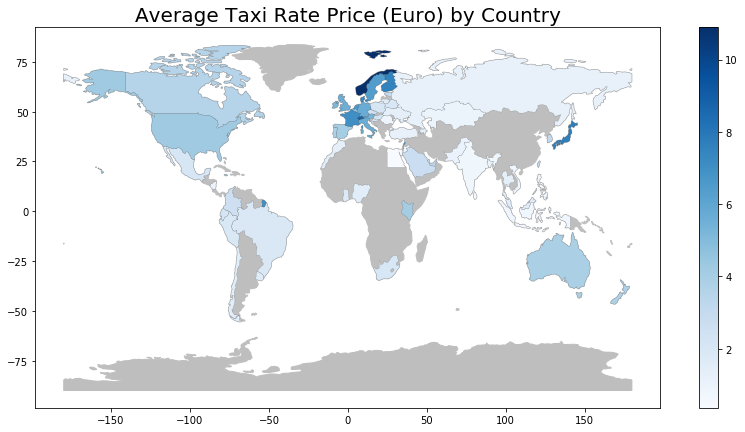

In [52]:
#Creates a chloropleth map
fig, ax = plt.subplots(figsize=(14, 7))
world3.plot(ax=ax, color='#BEBEBE', edgecolor='#BEBEBE')
world3[pd.notnull(world3['taxi_rate_EUR'])].plot(ax=ax,column='taxi_rate_EUR',cmap = 'Blues',legend = True, edgecolor = 'k',lw=0.1)
plt.title('Average Taxi Rate Price (Euro) by Country',fontsize=20)

plt.tight_layout


<function matplotlib.pyplot.tight_layout>

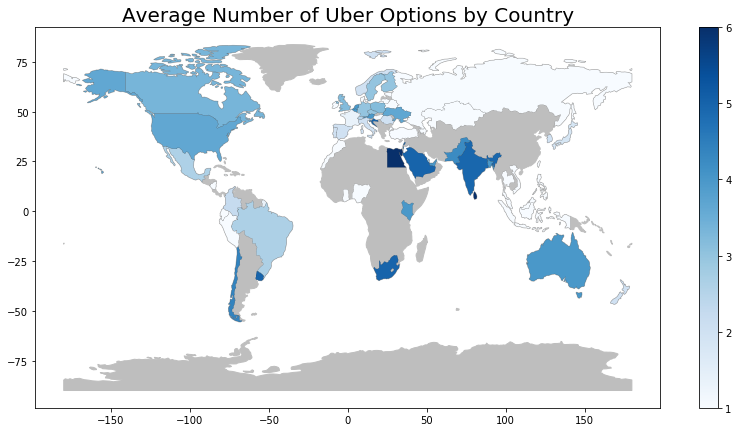

In [53]:
#Creates a chloropleth map
fig, ax = plt.subplots(figsize=(14, 7))
world3.plot(ax=ax, color='#BEBEBE', edgecolor='#BEBEBE')
world3[pd.notnull(world3['uber_options'])].plot(ax=ax,column='uber_options',cmap = 'Blues',legend = True, edgecolor = 'k',lw=0.1)
plt.title('Average Number of Uber Options by Country',fontsize=20)
plt.tight_layout


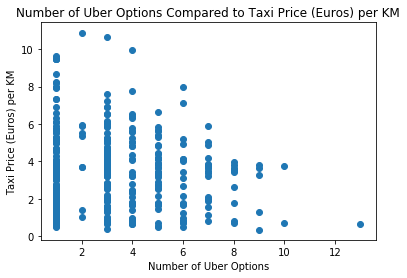

In [54]:
#Creates a scatter plot comparing the number of Uber options and the average price per kilometer in a taxi 
fig = plt.figure()
plt.scatter(city_comp1['uber_options'],city_comp1['taxi_rate_EUR'])
Ylabel = 'Taxi Price (Euros) per KM'
Xlabel = 'Number of Uber Options'
plt.title(Xlabel + " Compared to " + Ylabel)
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
plt.show()
#saves the plot
fig.savefig('C:/Users/acopelan/Desktop/untitled6/Taxi-Uber.png',dpi=150)

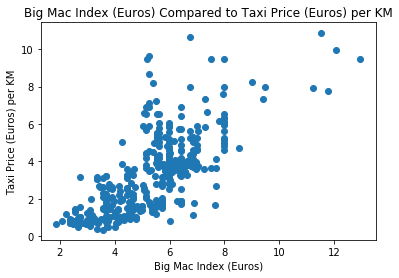

In [55]:
#Creates a scatter plot comparing the McMeal index and the average price per kilometer in a taxi
fig = plt.figure()
plt.scatter(city_comp1['McMeal_index'],city_comp1['taxi_rate_EUR'])

Ylabel = 'Taxi Price (Euros) per KM'
Xlabel = 'Big Mac Index (Euros)'
plt.title(Xlabel + " Compared to " + Ylabel)
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
plt.show()
#saves the plot
fig.savefig('C:/Users/acopelan/Desktop/untitled6/Taxi-McMeal.png',dpi=150)

In [56]:
city_comp2 = city_comp1.drop(['currency','fullname','McMeal','Taxi_1km_avg','EUR_rate','taxi_rate','Taxi_Start'], axis=1)
print city_comp2.info()
city_comp2 = city_comp2[pd.notnull(city_comp2['taxi_rate_EUR'])]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 435
Data columns (total 12 columns):
City             436 non-null object
taxi_rate_EUR    434 non-null float64
McMeal_index     436 non-null float64
europe           436 non-null int64
uber_options     436 non-null int64
country          436 non-null object
pop_est          435 non-null float64
continent        435 non-null object
name             435 non-null object
iso_a3           435 non-null object
gdp_md_est       435 non-null float64
geometry         435 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 44.3+ KB
None


In [57]:
#Creates a DataFrame of only European cities
city_comp3 = city_comp2[city_comp2['europe']==1]


In [58]:
#Creates a jointplot comparing the number of Uber options and the average price per kilometer in a taxi
city_comp4 = city_comp2[city_comp2['europe']==0]
print city_comp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 435
Data columns (total 12 columns):
City             358 non-null object
taxi_rate_EUR    358 non-null float64
McMeal_index     358 non-null float64
europe           358 non-null int64
uber_options     358 non-null int64
country          358 non-null object
pop_est          357 non-null float64
continent        357 non-null object
name             357 non-null object
iso_a3           357 non-null object
gdp_md_est       357 non-null float64
geometry         357 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 36.4+ KB
None


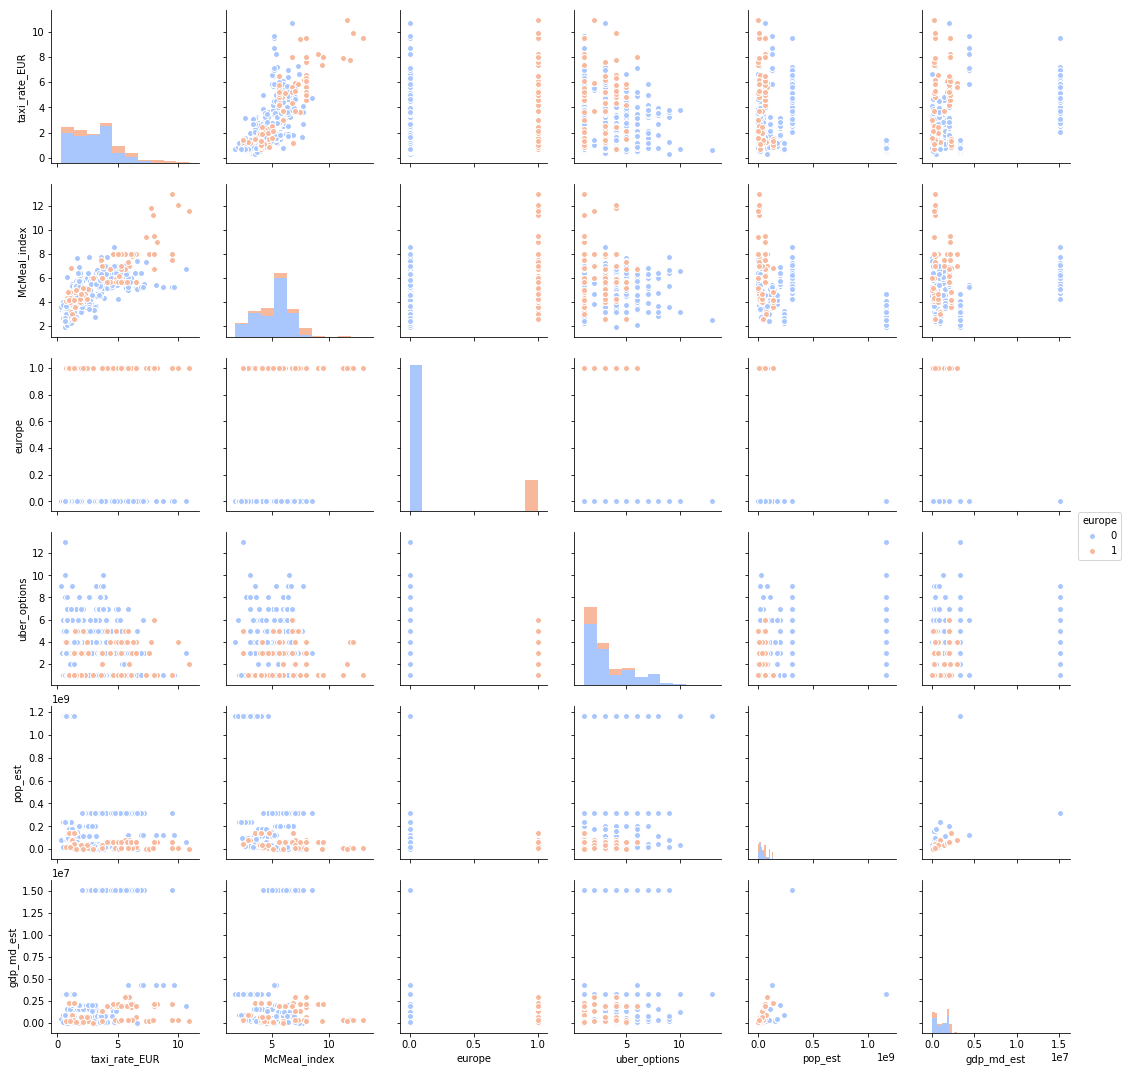

In [59]:
#Creates a pairplot for the data where "Europe or Not" is the category
sns_plot = sns.pairplot(city_comp2,hue='europe',palette = 'coolwarm')
sns_plot
#saves the plot
sns_plot.savefig("C:/Users/acopelan/Desktop/untitled6/sns-taxi-uber-pair.png",dpi=150)

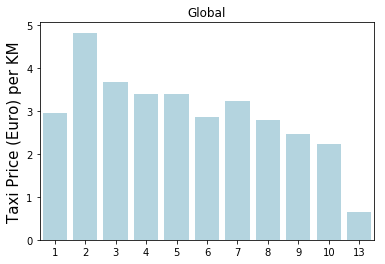

In [60]:
All_Uber_Taxi = city_comp2.groupby('uber_options')['taxi_rate_EUR'].mean().reset_index()
#Creates a barplot 
sns_plot = sns.barplot(x = 'uber_options', y='taxi_rate_EUR',data=All_Uber_Taxi,color='lightblue')
Ylabel = 'Taxi Price (Euro) per KM'
Xlabel = 'Number of Uber Options'

sns_plot.set_xlabel('')
sns_plot.set_ylabel(Ylabel,fontsize=15)
plt.title('Global',fontsize=12)
# fig.tight_layout()
sns_plot
#saves the plot
plt.savefig("C:/Users/acopelan/Desktop/untitled6/sns-taxi-uber-grouped-globally.png",dpi=150)

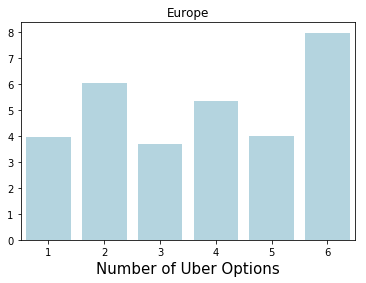

In [61]:
Europe_Uber_Taxi = city_comp3.groupby('uber_options')['taxi_rate_EUR'].mean().reset_index()
#Creates a barplot 
sns_plot = sns.barplot(x = 'uber_options', y='taxi_rate_EUR',data=Europe_Uber_Taxi,color='lightblue')
Ylabel = 'Taxi Price per KM'
Xlabel = 'Number of Uber Options'

sns_plot.set_xlabel(Xlabel,fontsize=15)
sns_plot.set_ylabel('')
plt.title("Europe",fontsize=12)
# fig.tight_layout()
sns_plot
#saves the plot
plt.savefig("C:/Users/acopelan/Desktop/untitled6/sns-taxi-uber-grouped-europe.png",dpi=150)


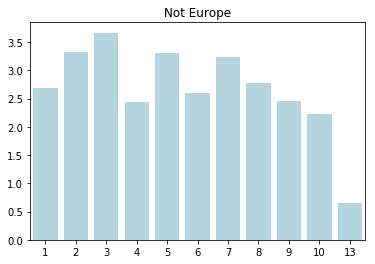

In [62]:
Not_Europe_Uber_Taxi = city_comp4.groupby('uber_options')['taxi_rate_EUR'].mean().reset_index()
#Creates a barplot 
sns_plot = sns.barplot(x = 'uber_options', y='taxi_rate_EUR',data=Not_Europe_Uber_Taxi,color='lightblue')
Ylabel = 'Taxi Price per KM'
Xlabel = 'Number of Uber Options'

sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
plt.title("Not Europe",fontsize=12)
# fig.tight_layout()
sns_plot
#saves the plot
plt.savefig("C:/Users/acopelan/Desktop/untitled6/sns-taxi-uber-grouped-noteurope.png",dpi=150)


In [63]:
city_comp2_2 = city_comp2[pd.notnull(city_comp2['pop_est'])&pd.notnull(city_comp2['pop_est'])]
#Creates the dataset for the X variable
X = city_comp2_2[[ 'uber_options', 'McMeal_index','europe','pop_est','gdp_md_est']]
#Creates the dataset for the y variable
y = city_comp2_2['taxi_rate_EUR']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
#splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
#creates a linear regression object 
lm = LinearRegression()

In [68]:
#trains the model 
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
#tests the predictions
predictions = lm.predict(X_test)

130


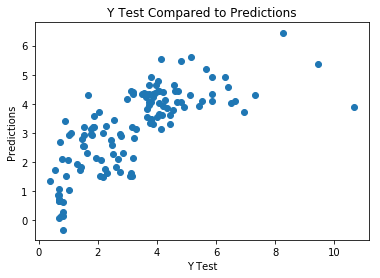

In [70]:
#Creates a scatterplot comparing the y_test and predictions of the model
fig = plt.figure()
plt.scatter(y_test,predictions)
# plt.title('y_test-predictions')
# plt.xlabel('y_test')
# plt.ylabel('predictions')
Xlabel = 'Y Test'
Ylabel = 'Predictions'
plt.title(Xlabel + " Compared to " + Ylabel)
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
print len(y_test)
#saves the plot
fig.savefig('C:/Users/acopelan/Desktop/untitled6/y_test-predictions_scatter.png',dpi=150)

In [71]:
from sklearn import metrics

In [72]:
#prints the linear regression score
print "the linear regression score;"
lm.score(X_test,y_test)

the linear regression score;


0.5529474146808604

C:\Users\acopelan\AppData\Local\Continuum\Anaconda2\envs\myenv1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


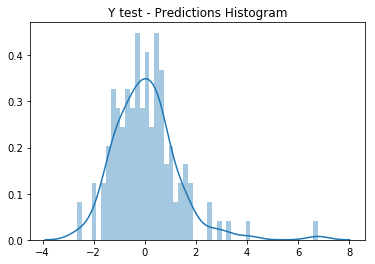

In [73]:
#Creates a distribution plot comparing the y_test and predictions of the model
sns_plot = sns.distplot((y_test-predictions),bins=50)
sns_plot
plt.title('Y test - Predictions Histogram')
plt.xlabel('')

#saves the plot
plt.savefig("C:/Users/acopelan/Desktop/untitled6/y_test-predictions.png",dpi=150)

In [74]:
#applies the ols model and prints the data summary
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          taxi_rate_EUR   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     605.3
Date:                Sun, 02 Sep 2018   Prob (F-statistic):          1.63e-191
Time:                        11:38:40   Log-Likelihood:                -741.20
No. Observations:                 433   AIC:                             1492.
Df Residuals:                     428   BIC:                             1513.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
uber_options    -0.0670      0.031     -2.138      0.033      -0.129      -0.005
McMeal_index     0.5851      0.024     24.084      0.000       0.537       0.633
europe           0.7346      0.193      3.807      0.000       0.355       1.114
pop_est      -1.213e-09   2.55e-10     -4.758      0.000   -1.71e-09   -7.12e-10
gdp_md_est      9.5e-08   1.21e-08      7.823      0.000    7.11e-08    1.19e-07
==============================================================================
Omnibus:                      132.466   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.399
Skew:                           1.389   Prob(JB):                     1.73e-95
Kurtosis:                       7.058   Cond. No.                     1.04e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""